# Benchmarking Crypto Valuations: A Data-Driven Approach

The goal of this analysis is to estimate the potential valuation range for a new crypto platform called Extra Finance (https://app.extrafi.io/). We will benchmark comparable platforms to derive data-driven valuation estimates for Extra Finance based on its current adoption metrics.

Our approach will involve analyzing historical data on the ratio of platform volumes (TVL) to their associated decentralized exchange (DEX) volumes to project a feasible TVL range for Extra Finance. We will also benchmark Market Cap/TVL ratios of competitors to estimate valuation multiples. Applying these benchmarks to Extra Finance's adoption metrics will produce a valuation range.

The analysis found Extra Finance's current USD 25M TVL and USD 3M Market Cap sit near the lower bound of the projected USD 26-65M TVL and USD 3-9M Market Cap ranges based on benchmarks. This implies opportunities for growth if Extra Finance continues increasing adoption. The data-driven framework provides grounded estimates for new crypto valuations.

## I. Platform and DEX Correlation; Capture Rate

Leveraged platforms like Extra Finance allow their users to use leverage when accessing the particular DEX it is based on.

We will start by exploring how closely the volumes of a platform and its "donor" DEX are correlated, and calculate the percentage of DEX volume that is captured.

We will look at 3 comparable projects operating on different blockchains, as there is usually a single large decentralized exchange operating on a given chain (as a farming venue), and a platform that provides leveraged access to it.

TVL data for all projects was downloaded from https://defillama.com/ on 13/09/2023.

## Francium Platform

The Francium platform (https://francium.io) operates on the Solana network and provides leveraged access to the Raydium and Orca exchanges. We will explore the dynamics of the Francium TVL over time and whether there is any correlation with the TVLs of Raydium and Orca.

In [274]:
import pandas as pd

In [275]:
# Loading Francium data
francium = pd.read_csv('francium.csv')

# Dropping unrelevant columns
francium_1 = francium.drop(['Unnamed: 0', 'Timestamp'], axis=1)

# Dropping first 4 NaN rows
francium_2 = francium_1.iloc[4:,:].copy()

# Renaming the TVL column
francium_3 = francium_2.rename(columns={'Francium':'Francium_TVL'})

francium_3

,Date,Francium_TVL
4,01/10/2021,11913904.381666534
5,02/10/2021,14383496.8015812
6,03/10/2021,15785864.267139448
7,04/10/2021,17168427.80273887
8,05/10/2021,16288421.951171495
...,...,...
712,09/09/2023,10042614.580697782
713,10/09/2023,10005704.234531702
714,11/09/2023,9825609.17372942
715,12/09/2023,9573835.384696623


In [276]:
# Exploring Francium dataset
francium_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 4 to 716
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          713 non-null    object
 1   Francium_TVL  713 non-null    object
dtypes: object(2)
memory usage: 11.3+ KB


In [277]:
# Converting TVL to numeric in mln
francium_3['Francium_TVL'] = pd.to_numeric(francium_3['Francium_TVL']) / 1000000

francium_3

,Date,Francium_TVL
4,01/10/2021,11.913904
5,02/10/2021,14.383497
6,03/10/2021,15.785864
7,04/10/2021,17.168428
8,05/10/2021,16.288422
...,...,...
712,09/09/2023,10.042615
713,10/09/2023,10.005704
714,11/09/2023,9.825609
715,12/09/2023,9.573835


In [278]:
# Changing Date to datetime
francium_3['Date'] = pd.to_datetime(francium_3['Date'], format='%d/%m/%Y')

francium_3

,Date,Francium_TVL
4,2021-10-01,11.913904
5,2021-10-02,14.383497
6,2021-10-03,15.785864
7,2021-10-04,17.168428
8,2021-10-05,16.288422
...,...,...
712,2023-09-09,10.042615
713,2023-09-10,10.005704
714,2023-09-11,9.825609
715,2023-09-12,9.573835


In [279]:
francium_3.isna().sum()

Date            0
Francium_TVL    0
dtype: int64

In [280]:
francium_3.describe()

,Francium_TVL
count,713.000000
mean,101.616839
std,114.263425
min,8.540242
25%,13.980299
50%,57.014205
75%,175.374237
max,427.438264


### Raydium DEX

In [281]:
# Importing Raydium data
raydium = pd.read_csv('raydium.csv', dtype='object')
raydium

,Unnamed: 0,Date,Timestamp,Raydium,Raydium.1,Raydium.2,Raydium.3,Raydium.4,Raydium.5,Raydium.6,...,Raydium.1654,Raydium.1655,Raydium.1656,Raydium.1657,Raydium.1658,Raydium.1659,Raydium.1660,Raydium.1661,Raydium.1662,Raydium.1663
0,NaN,NaN,NaN,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,...,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes
1,NaN,NaN,NaN,solana-staking,solana,Total,staking,solana-staking,solana,solana,...,Total,Total,Total,Total,Total,Total,Total,Total,Total,staking
2,NaN,NaN,NaN,TVL,TVL,TVL,TVL,Tokens(USD),Tokens(USD),Tokens(USD),...,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RAY,FRONK,SCS,...,XENO,MATICPO,CTUS,BLAZE,EUROE,BLZ,BLZE,BEAR,CHAI,RAY
4,NaN,18/03/2021,1616025600,NaN,NaN,148988798.24,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,NaN,09/09/2023,1694217600,4872234.394548686,30374766.46579227,30374766.46579227,4872234.394548686,4872234.394548686,2376.086150829133,2525.713946377416,...,1116556,1.98870449,104610.003777301,NaN,1408.167887,NaN,2120842.86692543,2143,9005.1767027,26776845.048823
910,NaN,10/09/2023,1694304000,4776845.493523791,30679835.976450346,30679835.976450346,4776845.493523791,4776845.493523791,2887.3718704449134,2471.4102176904025,...,1116556,1.98870449,99189.831104122,NaN,1374.995625,NaN,2439995.291477,2143,9357.15859912,26659628.045272
911,NaN,11/09/2023,1694390400,4560147.008400385,28590159.782537144,28590159.782537144,4560147.008400385,4560147.008400385,2574.000025388262,2344.6431434845917,...,1046432,1.98870449,99189.831104122,NaN,1224.892221,NaN,2720422.322575769,2137,9358.12248292,26623620.744739
912,NaN,12/09/2023,1694476800,4368223.944144442,27875470.59520813,27875470.59520813,4368223.944144442,4368223.944144442,656.8894001386848,2267.561271852268,...,1115405,1.98870449,99167.269823412,NaN,435.481819,NaN,3853696.884988252,2241,9358.12219812,26598209.487575


In [282]:
# Exploring TVL columns
raydium.iloc[:, 3:7].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Raydium    60 non-null     object
 1   Raydium.1  123 non-null    object
 2   Raydium.2  913 non-null    object
 3   Raydium.3  60 non-null     object
dtypes: object(4)
memory usage: 28.7+ KB


We will use Raydium.2 column that has total TVL values.

In [283]:
# Extracting Date and TVL columns
raydium_2 = raydium.iloc[:, [1, 5]].copy()

# Dropping first 4 NaN rows
raydium_2 = raydium_2.iloc[4:,:]

# Renaming the TVL column
raydium_2 = raydium_2.rename(columns={'Raydium.2':'Raydium_TVL'})


# Converting TVL to numeric in mln
raydium_2['Raydium_TVL'] = pd.to_numeric(raydium_2['Raydium_TVL']) / 1000000

# Changing Date to datetime
raydium_2['Date'] = pd.to_datetime(raydium_2['Date'], format='%d/%m/%Y')

raydium_2

,Date,Raydium_TVL
4,2021-03-18,148.988798
5,2021-03-19,153.204289
6,2021-03-20,147.690914
7,2021-03-21,151.935325
8,2021-03-22,152.981122
...,...,...
909,2023-09-09,30.374766
910,2023-09-10,30.679836
911,2023-09-11,28.590160
912,2023-09-12,27.875471


### Orca DEX

In [284]:
# Importing Orca data
orca = pd.read_csv('orca.csv')

orca

,Unnamed: 0,Date,Timestamp,Orca,Orca.1,Orca.2,Orca.3,Orca.4,Orca.5,Orca.6,...,Orca.942,Orca.943,Orca.944,Orca.945,Orca.946,Orca.947,Orca.948,Orca.949,Orca.950,Orca.951
0,NaN,NaN,NaN,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,...,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes
1,NaN,NaN,NaN,Total,solana,Total,Total,Total,Total,Total,...,solana,solana,solana,solana,solana,solana,solana,solana,solana,solana
2,NaN,NaN,NaN,TVL,TVL,Tokens(USD),Tokens(USD),Tokens(USD),Tokens(USD),Tokens(USD),...,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens
3,NaN,NaN,NaN,NaN,NaN,ethereum,kin,raydium,rope-token,tether,...,SOL,BNB,CWAR,BLAZE,EUROE,COCO,BLZ,BLZE,AEUSDC,PIP
4,NaN,14/04/2021,1.618358e+09,24980014.778269257,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,NaN,09/09/2023,1.694218e+09,36333875.10213509,36333875.10213509,NaN,NaN,NaN,NaN,NaN,...,350471.42090431775,0.00001601,0.000754562,NaN,79034.572253,873018631.41872,NaN,212384199.8739538,1e-9,20.000405206
878,NaN,10/09/2023,1.694304e+09,36105774.23147179,36105774.23147179,NaN,NaN,NaN,NaN,NaN,...,352292.1878737109,0.00001601,0.000754562,NaN,79168.959802,894878358.68841,NaN,259170503.81144217,1e-9,20.000405206
879,NaN,11/09/2023,1.694390e+09,34963207.44374769,34963207.44374769,NaN,NaN,NaN,NaN,NaN,...,346318.4753286981,0.00001601,0.000754562,NaN,79317.76041,886479544.30912,NaN,295642766.3148912,1e-9,20.000405206
880,NaN,12/09/2023,1.694477e+09,34553679.42434818,34553679.42434818,NaN,NaN,NaN,NaN,NaN,...,356953.5155733734,0.00001601,0.000754562,NaN,80700.615731,767449087.05277,NaN,302493423.0073206,1e-9,20.000405206


In [285]:
# Exploring TVL columns
orca.iloc[:, 3:5].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Orca    881 non-null    object
 1   Orca.1  93 non-null     object
dtypes: object(2)
memory usage: 13.9+ KB


We will use Orca column, since it has no missing values.

In [286]:
# Extracting Date and TVL columns
orca_2 = orca.iloc[:, [1, 3]].copy()

# Dropping first 4 NaN rows
orca_2 = orca_2.iloc[4:,:]

# Renaming the TVL column
orca_2 = orca_2.rename(columns={'Orca':'Orca_TVL'})


# Converting TVL to numeric in mln
orca_2['Orca_TVL'] = pd.to_numeric(orca_2['Orca_TVL']) / 1000000

# Changing Date to datetime
orca_2['Date'] = pd.to_datetime(orca_2['Date'], format='%d/%m/%Y')

orca_2

,Date,Orca_TVL
4,2021-04-14,24.980015
5,2021-04-15,25.259499
6,2021-04-16,25.595433
7,2021-04-17,25.203177
8,2021-04-18,24.947150
...,...,...
877,2023-09-09,36.333875
878,2023-09-10,36.105774
879,2023-09-11,34.963207
880,2023-09-12,34.553679


### Combining Francium, Raydium and Orca Datasets

In [287]:
# Merging Francium and Raydium datasets
francium_4 = francium_3.merge(right=raydium_2, on='Date', how='inner')

# Adding Orca dataset
francium_5 = francium_4.merge(right=orca_2, on='Date', how='inner')

francium_5.sort_values('Date', ascending=True)

,Date,Francium_TVL,Raydium_TVL,Orca_TVL
0,2021-10-01,11.913904,1501.825391,832.923070
1,2021-10-02,14.383497,1541.220563,877.468705
2,2021-10-03,15.785864,1578.328062,929.761707
3,2021-10-04,17.168428,1557.058042,948.816979
4,2021-10-05,16.288422,1571.152854,927.629369
...,...,...,...,...
704,2023-09-09,10.042615,30.374766,36.333875
705,2023-09-10,10.005704,30.679836,36.105774
706,2023-09-11,9.825609,28.590160,34.963207
707,2023-09-12,9.573835,27.875471,34.553679


In [288]:
# Exploring combined dataset
francium_5.describe()

,Francium_TVL,Raydium_TVL,Orca_TVL
count,709.000000,709.000000,709.000000
mean,101.822266,438.265398,261.019862
std,114.328757,594.654100,341.223427
min,8.540242,23.593702,29.761787
25%,14.022098,35.420837,40.807172
50%,57.783941,161.255390,84.945187
75%,175.374237,641.978599,381.327801
max,427.438264,2212.157128,1407.563280


In [289]:
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use('fivethirtyeight')

%matplotlib inline

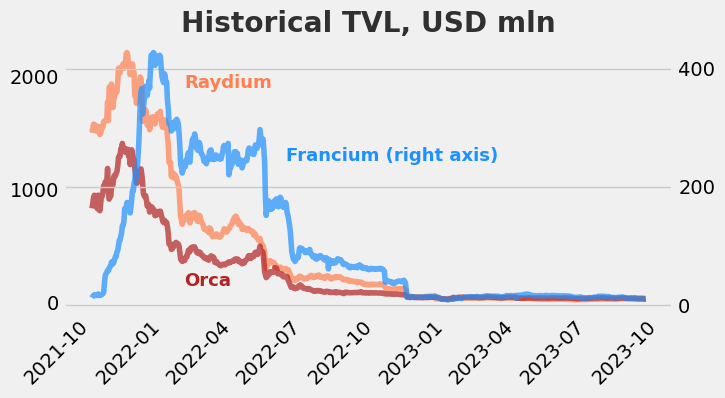

In [290]:
# Plotting the projects' historical TVLs
fig, ax1 = plt.subplots(figsize=(7,4))
ax2 = ax1.twinx()

ax1.plot(francium_5['Date'], francium_5['Raydium_TVL'], color='coral', alpha=0.7)
ax1.plot(francium_5['Date'], francium_5['Orca_TVL'], color='firebrick', alpha=0.7)
ax2.plot(francium_5['Date'], francium_5['Francium_TVL'], color='dodgerblue', alpha=0.7)

# Rotating xticks 45 degrees
fig.autofmt_xdate(rotation=45)

ax1.grid(visible=None)

# Title
ax1.set_title('Historical TVL, USD mln', weight='bold', alpha=0.8)

# Legend
ax1.text(x=19020, y=1900, s='Raydium', size=13, c='coral', weight='bold')
ax1.text(x=19020, y=150, s='Orca', size=13, c='firebrick', weight='bold')
ax1.text(x=19150, y=1250, s='Francium (right axis)', size=13, c='dodgerblue', weight='bold')

ax1.set_yticks([0, 1000, 2000])
ax2.set_yticks([0, 200, 400])

plt.show()

As a platform that provides leveraged access to Raydium and Orca, Francium may have a significant level of correlation with DEXes volumes. We will explore this correlation later.

Next, we will visualize the density distribution of the projects' TVLs.

In [291]:
from scipy.stats import gaussian_kde
import numpy as np

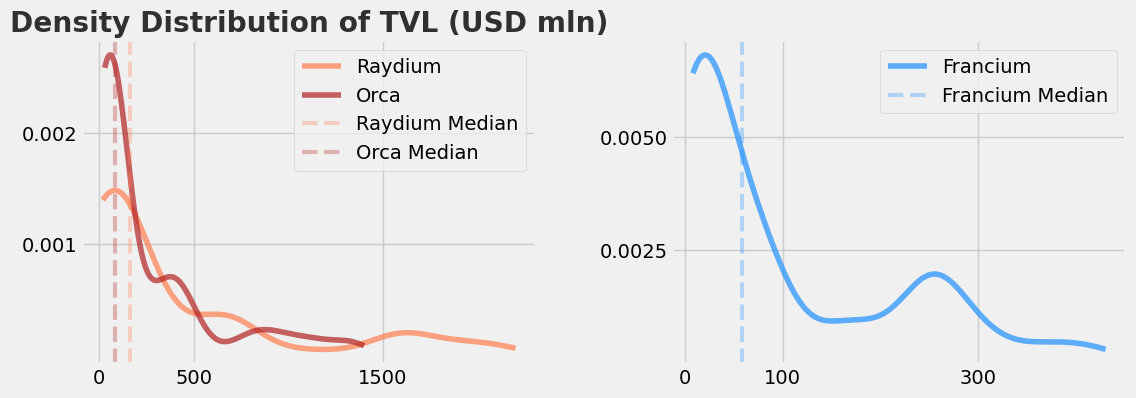

In [292]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# Range of min-max values
range_ray = np.linspace(20, 2200, 200)
range_or = np.linspace(30, 1400, 200)
range_fr = np.linspace(8, 430, 200)

# Gaussian kde
density_ray = gaussian_kde(francium_5['Raydium_TVL'])
density_or = gaussian_kde(francium_5['Orca_TVL'])
density_fr = gaussian_kde(francium_5['Francium_TVL'])

# Visualization of distribution
ax1.plot(range_ray, density_ray(range_ray), color='coral', alpha=0.7, label='Raydium')
ax1.plot(range_or, density_or(range_or), color='firebrick', alpha=0.7, label='Orca')
ax2.plot(range_fr, density_fr(range_fr), color='dodgerblue', alpha=0.7, label='Francium')

# Median values
ax2.axvline(x=francium_5['Francium_TVL'].median(), color='dodgerblue', ls='--', alpha=0.3, label='Francium Median', lw=3)
ax1.axvline(x=francium_5['Raydium_TVL'].median(), color='coral', ls='--', alpha=0.3, label='Raydium Median', lw=3)
ax1.axvline(x=francium_5['Orca_TVL'].median(), color='firebrick', ls='--', alpha=0.3, label='Orca Median', lw=3)

ax1.set_title('Density Distribution of TVL (USD mln)', weight='bold', alpha=0.8)

ax1.legend()
ax2.legend()

ax1.set_yticks([0.001, 0.002])
ax1.set_xticks([0, 500, 1500])

ax2.set_yticks([0.0025, 0.005])
ax2.set_xticks([0, 100, 300])

fig.subplots_adjust(wspace=0.3)

plt.show()

The Francium and Orca distributions are centered around the median with low variance, while the Raydium volumes are more dispersed.

Next, we examine the correlation between the projects.

In [293]:
francium_5.corr()

,Francium_TVL,Raydium_TVL,Orca_TVL
Francium_TVL,1.000000,0.647211,0.595155
Raydium_TVL,0.647211,1.000000,0.986749
Orca_TVL,0.595155,0.986749,1.000000


Orca and Raydium are almost perfectly correlated, and their correlation with Francium is also quite high.

Next, we will calculate how much of its associated DEXes are captured by Francium.

In [294]:
# Calculating the Capture rate
francium_5['Capture_rate'] = francium_5['Francium_TVL'] / (francium_5['Raydium_TVL'] + francium_5['Orca_TVL']) * 100

# Calculating 30-day moving average to smooth out the fluctuations
francium_5['Capture_rate_MA30'] = francium_5['Capture_rate'].rolling(30).mean()

francium_5

,Date,Francium_TVL,Raydium_TVL,Orca_TVL,Capture_rate,Capture_rate_MA30
0,2021-10-01,11.913904,1501.825391,832.923070,0.510286,NaN
1,2021-10-02,14.383497,1541.220563,877.468705,0.594681,NaN
2,2021-10-03,15.785864,1578.328062,929.761707,0.629398,NaN
3,2021-10-04,17.168428,1557.058042,948.816979,0.685127,NaN
4,2021-10-05,16.288422,1571.152854,927.629369,0.651854,NaN
...,...,...,...,...,...,...
704,2023-09-09,10.042615,30.374766,36.333875,15.054443,16.489754
705,2023-09-10,10.005704,30.679836,36.105774,14.981826,16.400401
706,2023-09-11,9.825609,28.590160,34.963207,15.460407,16.323203
707,2023-09-12,9.573835,27.875471,34.553679,15.335521,16.253094


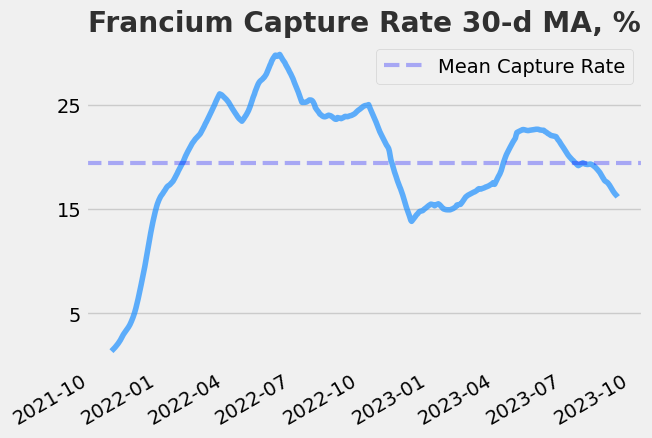

In [295]:
# Plotting the capture rate
francium_5.plot('Date', 'Capture_rate_MA30', color='dodgerblue', label='', alpha=0.7)

plt.axhline(francium_5['Capture_rate'].mean(), color='blue', ls='--', alpha=0.3, label='Mean Capture Rate', lw=3)

plt.title('Francium Capture Rate 30-d MA, %', weight='bold', alpha=0.8)

plt.xlabel('')
plt.yticks([5, 15, 25])

plt.grid(visible=False, axis='x')

plt.legend()

plt.show()

During 2022, Francium used to capture about 20-25% of the connected DEXes volumes, but then its capture rate dropped to 15-20% levels.

We will continue to study the volatility of the capture rate.

In [296]:
francium_5['Capture_rate'].describe()

count    709.000000
mean      19.354455
std        6.584526
min        0.510286
25%       16.228385
50%       20.579955
75%       23.695354
max       33.861301
Name: Capture_rate, dtype: float64

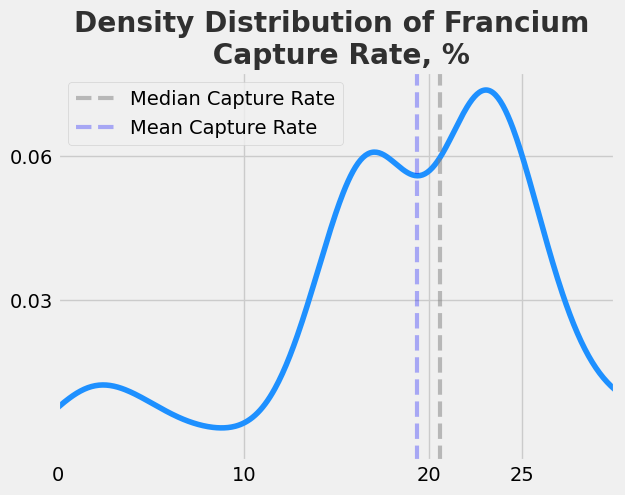

In [297]:
# Plotting the density distribution
francium_5['Capture_rate'].plot.kde(label='', color='dodgerblue')

plt.xlim([0,30])

plt.axvline(x=francium_5['Capture_rate'].median(), color='grey',
            ls='--', alpha=0.5, label='Median Capture Rate', lw=3)
plt.axvline(x=francium_5['Capture_rate'].mean(), color='blue',
            ls='--', alpha=0.3, label='Mean Capture Rate', lw=3)

plt.title('Density Distribution of Francium \n Capture Rate, %', weight='bold', alpha=0.8)

plt.ylabel('')

plt.yticks([0.03, 0.06])
plt.xticks([0, 10, 20, 25])

plt.legend()

plt.show()

As can be seen from the historical data, there were two distinct periods for Francium, in which the capture rate peaked at 25% in 2022 and dropped to 15% in 2023, resulting in a considerable amount of variance overall.

We will use this 15-25% range for our analysis, as it contains about 2/3 of all values.

In [298]:
francium_minmax_range = francium_5['Capture_rate'][(francium_5['Capture_rate'] >=15) & (francium_5['Capture_rate'] <= 25)]

len(francium_minmax_range) / len(francium_5['Capture_rate']) * 100

68.5472496473907

## Alpaca Finance Platform

Alpaca Finance (https://www.alpacafinance.org) operates on the BSC network and offers leveraged opportunities on Pancakeswap DEX.

In [299]:
# Importing Alpaca dataset
alpaca = pd.read_csv('alpaca-leveraged-yield-farming.csv')

alpaca

,Unnamed: 0,Date,Timestamp,Alpaca Leveraged Yield Farming,Alpaca Leveraged Yield Farming.1,Alpaca Leveraged Yield Farming.2,Alpaca Leveraged Yield Farming.3,Alpaca Leveraged Yield Farming.4,Alpaca Leveraged Yield Farming.5,Alpaca Leveraged Yield Farming.6,...,Alpaca Leveraged Yield Farming.298,Alpaca Leveraged Yield Farming.299,Alpaca Leveraged Yield Farming.300,Alpaca Leveraged Yield Farming.301,Alpaca Leveraged Yield Farming.302,Alpaca Leveraged Yield Farming.303,Alpaca Leveraged Yield Farming.304,Alpaca Leveraged Yield Farming.305,Alpaca Leveraged Yield Farming.306,Alpaca Leveraged Yield Farming.307
0,NaN,NaN,NaN,Leveraged Farming,Leveraged Farming,Leveraged Farming,Leveraged Farming,Leveraged Farming,Leveraged Farming,Leveraged Farming,...,Leveraged Farming,Leveraged Farming,Leveraged Farming,Leveraged Farming,Leveraged Farming,Leveraged Farming,Leveraged Farming,Leveraged Farming,Leveraged Farming,Leveraged Farming
1,NaN,NaN,NaN,bsc,bsc-staking,fantom-staking,Total,staking,fantom,bsc,...,fantom,fantom,fantom,fantom,fantom,fantom,fantom,fantom,fantom,fantom
2,NaN,NaN,NaN,TVL,TVL,TVL,TVL,TVL,TVL,Tokens(USD),...,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ETH,...,ALPACA,MIM,WBTC,USDT,DAI,TSHARE,TOMB,BTC,ETH,FUSDT
4,NaN,04/06/2021,1.622765e+09,688329460.0811179,NaN,NaN,688329460.0811179,NaN,NaN,168640670.5442363,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,NaN,09/09/2023,1.694218e+09,72203287.22446615,8048727.377301546,156629.02533159233,72720582.31827225,8205356.402633138,517295.0938060968,3698539.9412721437,...,132999.13005054207,NaN,NaN,NaN,NaN,NaN,24045.25911183584,NaN,NaN,NaN
821,NaN,10/09/2023,1.694304e+09,71892190.4908374,7977855.471993169,155233.7820020603,72401048.26462837,8133089.2539952295,508857.77379096573,3694397.7975587468,...,132999.13005054207,NaN,NaN,NaN,NaN,NaN,24045.25911183584,NaN,NaN,NaN
822,NaN,11/09/2023,1.694390e+09,70348622.87952152,7717607.778345452,149917.80122381035,70848077.6052177,7867525.579569262,499454.7256961713,3677023.0748773385,...,132999.13005054207,NaN,NaN,NaN,NaN,NaN,24045.25911183584,NaN,NaN,NaN
823,NaN,12/09/2023,1.694477e+09,69201556.1466073,7507404.089297065,146536.26598667042,69683162.8338482,7653940.355283735,481606.6872408938,3560186.292811119,...,132999.13005054207,NaN,NaN,NaN,NaN,NaN,24045.25911183584,NaN,NaN,NaN


In [300]:
# Exploring TVL columns
alpaca.iloc[:, 3:9].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Alpaca Leveraged Yield Farming    599 non-null    object
 1   Alpaca Leveraged Yield Farming.1  590 non-null    object
 2   Alpaca Leveraged Yield Farming.2  533 non-null    object
 3   Alpaca Leveraged Yield Farming.3  824 non-null    object
 4   Alpaca Leveraged Yield Farming.4  590 non-null    object
 5   Alpaca Leveraged Yield Farming.5  575 non-null    object
dtypes: object(6)
memory usage: 38.8+ KB


The Alpaca..3 column has no null values, and it is the sum of the farm TVL on BSC (Alpaca.. column) and Fantom (Alpaca..5 column) networks. Since we are only interested in the complete data on BSC, we subtract the values of Alpaca..5 from Alpaca..3 so that the result is the TVL on BSC.

Since the TVL on Fantom is historically low on Alpaca (less than 1%), we will replace missing values in Alpaca..5 with zeros.

In [301]:
# Dropping first 4 NaN rows
alpaca_2 = alpaca.iloc[4:,:].copy()

# Replacing NaN with zeroes
alpaca_2['Alpaca Leveraged Yield Farming.5'] = pd.to_numeric(alpaca_2['Alpaca Leveraged Yield Farming.5']).fillna(value=0)

# Converting TVL to numeric
alpaca_2['Alpaca_TVL'] = pd.to_numeric(alpaca_2['Alpaca Leveraged Yield Farming.3'])

# Subtracting Alpaca..3 and converting the result to mln
alpaca_2['Alpaca_TVL'] = (alpaca_2['Alpaca_TVL'] - alpaca_2['Alpaca Leveraged Yield Farming.5']) / 1000000

alpaca_2

,Unnamed: 0,Date,Timestamp,Alpaca Leveraged Yield Farming,Alpaca Leveraged Yield Farming.1,Alpaca Leveraged Yield Farming.2,Alpaca Leveraged Yield Farming.3,Alpaca Leveraged Yield Farming.4,Alpaca Leveraged Yield Farming.5,Alpaca Leveraged Yield Farming.6,...,Alpaca Leveraged Yield Farming.299,Alpaca Leveraged Yield Farming.300,Alpaca Leveraged Yield Farming.301,Alpaca Leveraged Yield Farming.302,Alpaca Leveraged Yield Farming.303,Alpaca Leveraged Yield Farming.304,Alpaca Leveraged Yield Farming.305,Alpaca Leveraged Yield Farming.306,Alpaca Leveraged Yield Farming.307,Alpaca_TVL
4,NaN,04/06/2021,1.622765e+09,688329460.0811179,NaN,NaN,688329460.0811179,NaN,0.000000,168640670.5442363,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,688.329460
5,NaN,05/06/2021,1.622851e+09,683161902.7816217,NaN,NaN,683161902.7816217,NaN,0.000000,164290919.8455435,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,683.161903
6,NaN,06/06/2021,1.622938e+09,708653774.6020882,NaN,NaN,708653774.6020882,NaN,0.000000,172559987.78761512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,708.653775
7,NaN,07/06/2021,1.623024e+09,800830758.6728445,NaN,NaN,800830758.6728445,NaN,0.000000,172926198.6020055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800.830759
8,NaN,08/06/2021,1.623110e+09,818367571.4253862,NaN,NaN,818367571.4253862,NaN,0.000000,164682689.27327248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,818.367571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,NaN,09/09/2023,1.694218e+09,72203287.22446615,8048727.377301546,156629.02533159233,72720582.31827225,8205356.402633138,517295.093806,3698539.9412721437,...,NaN,NaN,NaN,NaN,NaN,24045.25911183584,NaN,NaN,NaN,72.203287
821,NaN,10/09/2023,1.694304e+09,71892190.4908374,7977855.471993169,155233.7820020603,72401048.26462837,8133089.2539952295,508857.773791,3694397.7975587468,...,NaN,NaN,NaN,NaN,NaN,24045.25911183584,NaN,NaN,NaN,71.892190
822,NaN,11/09/2023,1.694390e+09,70348622.87952152,7717607.778345452,149917.80122381035,70848077.6052177,7867525.579569262,499454.725696,3677023.0748773385,...,NaN,NaN,NaN,NaN,NaN,24045.25911183584,NaN,NaN,NaN,70.348623
823,NaN,12/09/2023,1.694477e+09,69201556.1466073,7507404.089297065,146536.26598667042,69683162.8338482,7653940.355283735,481606.687241,3560186.292811119,...,NaN,NaN,NaN,NaN,NaN,24045.25911183584,NaN,NaN,NaN,69.201556


In [302]:
# Extracting Date and TVL columns
alpaca_3 = alpaca_2[['Date', 'Alpaca_TVL']].copy()

# Changing Date to datetime
alpaca_3['Date'] = pd.to_datetime(alpaca_3['Date'], format='%d/%m/%Y')

alpaca_3

,Date,Alpaca_TVL
4,2021-06-04,688.329460
5,2021-06-05,683.161903
6,2021-06-06,708.653775
7,2021-06-07,800.830759
8,2021-06-08,818.367571
...,...,...
820,2023-09-09,72.203287
821,2023-09-10,71.892190
822,2023-09-11,70.348623
823,2023-09-12,69.201556


### Pancakeswap DEX

In [303]:
# Importing Pancakeswap dataset #1
cake_amm = pd.read_csv('pancakeswap-amm.csv')

cake_amm

,Unnamed: 0,Date,Timestamp,PancakeSwap AMM,PancakeSwap AMM.1,PancakeSwap AMM.2,PancakeSwap AMM.3,PancakeSwap AMM.4,PancakeSwap AMM.5,PancakeSwap AMM.6,...,PancakeSwap AMM.218,PancakeSwap AMM.219,PancakeSwap AMM.220,PancakeSwap AMM.221,PancakeSwap AMM.222,PancakeSwap AMM.223,PancakeSwap AMM.224,PancakeSwap AMM.225,PancakeSwap AMM.226,PancakeSwap AMM.227
0,NaN,NaN,NaN,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,...,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes
1,NaN,NaN,NaN,polygon_zkevm,aptos,Total,base,bsc,ethereum,era,...,linea,linea,linea,linea,ethereum-staking,arbitrum,arbitrum,arbitrum,arbitrum,staking
2,NaN,NaN,NaN,TVL,TVL,TVL,TVL,TVL,TVL,TVL,...,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,WETH,USDC,USDT,DAI,CAKE,ARB,USDT,USDC,WETH,CAKE
4,NaN,22/04/2021,1.619050e+09,NaN,NaN,598.9982962198354,NaN,598.9982962198354,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108663016.42025651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,NaN,09/09/2023,1.694218e+09,1430.5162246037123,13501933.826051636,1059751804.2239888,436.2189858567539,1044117607.5077469,1109541.4602559807,155491.28975160455,...,0.0907363934474962,0.820635,135.516042,0.001825196956710251,255859.17900000815,1883.4104597259295,243.964951,106.531549,528.1546377085784,220329948.89251018
875,NaN,10/09/2023,1.694304e+09,1416.767881823069,13606912.532566966,1054610125.82229,499.9805477366233,1038915614.7709801,1110808.7009991687,116619.20880369616,...,0.12500067458866207,19.759171,174.283661,0.001825196956710251,256536.68509371395,1891.4911424251907,247.655301,106.976149,524.4605967803001,220177986.24427593
876,NaN,11/09/2023,1.694390e+09,1406.2771655795068,13522765.4600259,1044320775.8109983,12660.972243198154,1028698211.414064,1104121.3646353749,141519.71153120176,...,0.1256208812912085,19.142492,174.007326,0.001825196956710251,257616.13190745556,1942.1226726974403,247.850045,106.005829,517.845484316089,220044830.04461256
877,NaN,12/09/2023,1.694477e+09,1596.8330148116786,13342580.420390083,1022715622.8262318,1254.6888467329086,1007389767.2499903,1072995.5642177137,107004.94786934262,...,0.3022227582086945,19.179467,192.434389,0.001825196956710251,255202.99788721153,2002.523425596996,246.069773,104.41969,514.6622126062772,220069830.84171072


In [304]:
# Extracting names of TVL columns
cake_amm_tvls = cake_amm.iloc[2, :][cake_amm.iloc[2, :] == 'TVL'].index

# Exploring TVL columns
cake_amm[cake_amm_tvls].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PancakeSwap AMM     80 non-null     object
 1   PancakeSwap AMM.1   324 non-null    object
 2   PancakeSwap AMM.2   878 non-null    object
 3   PancakeSwap AMM.3   19 non-null     object
 4   PancakeSwap AMM.4   878 non-null    object
 5   PancakeSwap AMM.5   317 non-null    object
 6   PancakeSwap AMM.6   52 non-null     object
 7   PancakeSwap AMM.7   878 non-null    object
 8   PancakeSwap AMM.8   59 non-null     object
 9   PancakeSwap AMM.9   124 non-null    object
 10  PancakeSwap AMM.10  40 non-null     object
 11  PancakeSwap AMM.11  878 non-null    object
dtypes: object(12)
memory usage: 82.5+ KB


In [305]:
cake_amm[cake_amm_tvls]

,PancakeSwap AMM,PancakeSwap AMM.1,PancakeSwap AMM.2,PancakeSwap AMM.3,PancakeSwap AMM.4,PancakeSwap AMM.5,PancakeSwap AMM.6,PancakeSwap AMM.7,PancakeSwap AMM.8,PancakeSwap AMM.9,PancakeSwap AMM.10,PancakeSwap AMM.11
0,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes
1,polygon_zkevm,aptos,Total,base,bsc,ethereum,era,bsc-staking,linea,ethereum-staking,arbitrum,staking
2,TVL,TVL,TVL,TVL,TVL,TVL,TVL,TVL,TVL,TVL,TVL,TVL
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,598.9982962198354,NaN,598.9982962198354,NaN,NaN,2877847143.638472,NaN,NaN,NaN,2877847143.638472
...,...,...,...,...,...,...,...,...,...,...,...,...
874,1430.5162246037123,13501933.826051636,1059751804.2239888,436.2189858567539,1044117607.5077469,1109541.4602559807,155491.28975160455,272891871.2447526,284.8279347966785,317265.3819600101,865078.5770372999,273209136.6267126
875,1416.767881823069,13606912.532566966,1054610125.82229,499.9805477366233,1038915614.7709801,1110808.7009991687,116619.20880369616,270503382.95779413,397.99567716115405,315540.12266526814,857855.8648332687,270818923.0804594
876,1406.2771655795068,13522765.4600259,1044320775.8109983,12660.972243198154,1028698211.414064,1104121.3646353749,141519.71153120176,270338273.11262727,395.1949797650436,314291.68092709576,839695.4163533913,270652564.79355437
877,1596.8330148116786,13342580.420390083,1022715622.8262318,1254.6888467329086,1007389767.2499903,1072995.5642177137,107004.94786934262,250588675.74195877,680.4004938363313,290931.4175914211,799742.7214089539,250879607.1595502


...AMM.4 column has no null values and stores the data for farming on BSC, so we can use it.

In [306]:
# Extracting Date and TVL columns
cake_amm_2 = cake_amm.iloc[:, [1, 7]].copy()

# Dropping first 4 NaN rows
cake_amm_2 = cake_amm_2.iloc[4:,:]

# Renaming the TVL column
cake_amm_2 = cake_amm_2.rename(columns={'PancakeSwap AMM.4':'Cake_amm_TVL'})

# Converting TVL to numeric in mln
cake_amm_2['Cake_amm_TVL'] = pd.to_numeric(cake_amm_2['Cake_amm_TVL']) / 1000000

# Changing Date to datetime
cake_amm_2['Date'] = pd.to_datetime(cake_amm_2['Date'], format='%d/%m/%Y')

cake_amm_2

,Date,Cake_amm_TVL
4,2021-04-22,0.000599
5,2021-04-23,0.000599
6,2021-04-24,3116.743127
7,2021-04-25,4200.814953
8,2021-04-26,5061.871302
...,...,...
874,2023-09-09,1044.117608
875,2023-09-10,1038.915615
876,2023-09-11,1028.698211
877,2023-09-12,1007.389767


In [307]:
# Importing Pancakeswap dataset #2
cake_amm_v3 = pd.read_csv('pancakeswap-amm-v3.csv')

cake_amm_v3

,Unnamed: 0,Date,Timestamp,PancakeSwap AMM V3,PancakeSwap AMM V3.1,PancakeSwap AMM V3.2,PancakeSwap AMM V3.3,PancakeSwap AMM V3.4,PancakeSwap AMM V3.5,PancakeSwap AMM V3.6,...,PancakeSwap AMM V3.3224,PancakeSwap AMM V3.3225,PancakeSwap AMM V3.3226,PancakeSwap AMM V3.3227,PancakeSwap AMM V3.3228,PancakeSwap AMM V3.3229,PancakeSwap AMM V3.3230,PancakeSwap AMM V3.3231,PancakeSwap AMM V3.3232,PancakeSwap AMM V3.3233
0,NaN,NaN,NaN,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,...,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes
1,NaN,NaN,NaN,bsc,ethereum,era,polygon_zkevm,linea,arbitrum,Total,...,Total,Total,Total,Total,Total,Total,base,base,base,base
2,NaN,NaN,NaN,TVL,TVL,TVL,TVL,TVL,TVL,TVL,...,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,EPIK,CR,WPAY,GAT,BANANA,CEEK,WETH,USDBC,DAI,CBETH
4,NaN,02/04/2023,1.680394e+09,2824.6762471546363,1506.440897879785,NaN,NaN,NaN,NaN,4331.117145034421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,NaN,09/09/2023,1.694218e+09,241813735.05645102,55234181.922134005,3269685.7653078334,437371.99002885557,468788.25227545435,1436364.6378815023,303408328.7930877,...,NaN,NaN,NaN,NaN,NaN,NaN,153.801935079069,264261.84529,44850.94333641621,109.56695114284167
152,NaN,10/09/2023,1.694304e+09,238893874.07369748,57291154.51022572,3295302.6108067227,436805.49494916695,524642.2296928648,1445907.2148116326,302645279.9292785,...,NaN,NaN,NaN,NaN,NaN,NaN,163.9827962425587,266958.49024,64978.07383076483,92.51445544016515
153,NaN,11/09/2023,1.694390e+09,236326768.66638392,57248950.96066847,3224431.0153871286,407312.59706222697,541110.8697506058,1431353.1634893687,299985929.5717297,...,6013883.888743425,NaN,NaN,NaN,NaN,NaN,227.61657072611055,191224.047064,59234.328711268856,110.34340491664703
154,NaN,12/09/2023,1.694477e+09,230823748.4431636,54031400.746697135,3228621.1960527357,411441.32854423474,584673.9676875044,1355089.9397164762,291210171.20171845,...,6119616.344885185,0.002920374319690839,2e-18,1e-18,1582.0628271947705,NaN,248.79615607693233,147690.289581,58829.256445568004,112.56324619290207


In [308]:
# Extracting names of TVL columns
cake_amm_v3_tvls = cake_amm_v3.iloc[2, :][cake_amm_v3.iloc[2, :] == 'TVL'].index

# Exploring TVL columns
cake_amm_v3[cake_amm_v3_tvls].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PancakeSwap AMM V3    155 non-null    object
 1   PancakeSwap AMM V3.1  155 non-null    object
 2   PancakeSwap AMM V3.2  52 non-null     object
 3   PancakeSwap AMM V3.3  81 non-null     object
 4   PancakeSwap AMM V3.4  59 non-null     object
 5   PancakeSwap AMM V3.5  40 non-null     object
 6   PancakeSwap AMM V3.6  155 non-null    object
 7   PancakeSwap AMM V3.7  19 non-null     object
dtypes: object(8)
memory usage: 9.9+ KB


In [309]:
cake_amm_v3[cake_amm_v3_tvls]

,PancakeSwap AMM V3,PancakeSwap AMM V3.1,PancakeSwap AMM V3.2,PancakeSwap AMM V3.3,PancakeSwap AMM V3.4,PancakeSwap AMM V3.5,PancakeSwap AMM V3.6,PancakeSwap AMM V3.7
0,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes
1,bsc,ethereum,era,polygon_zkevm,linea,arbitrum,Total,base
2,TVL,TVL,TVL,TVL,TVL,TVL,TVL,TVL
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2824.6762471546363,1506.440897879785,NaN,NaN,NaN,NaN,4331.117145034421,NaN
...,...,...,...,...,...,...,...,...
151,241813735.05645102,55234181.922134005,3269685.7653078334,437371.99002885557,468788.25227545435,1436364.6378815023,303408328.7930877,748201.1690090308
152,238893874.07369748,57291154.51022572,3295302.6108067227,436805.49494916695,524642.2296928648,1445907.2148116326,302645279.9292785,757593.7950949119
153,236326768.66638392,57248950.96066847,3224431.0153871286,407312.59706222697,541110.8697506058,1431353.1634893687,299985929.5717297,806002.2989880191
154,230823748.4431636,54031400.746697135,3228621.1960527357,411441.32854423474,584673.9676875044,1355089.9397164762,291210171.20171845,775195.579856758


...AMM.V3 column has no null values and stores the data for farming on BSC, so we will use it.

In [310]:
# Extracting Date and TVL columns
cake_amm_v3_2 = cake_amm_v3.iloc[:, [1, 3]].copy()

# Dropping first 4 NaN rows
cake_amm_v3_2 = cake_amm_v3_2.iloc[4:,:]

# Renaming the TVL column
cake_amm_v3_2 = cake_amm_v3_2.rename(columns={'PancakeSwap AMM V3':'Cake_amm_v3_TVL'})

# Converting TVL to numeric in mln
cake_amm_v3_2['Cake_amm_v3_TVL'] = pd.to_numeric(cake_amm_v3_2['Cake_amm_v3_TVL']) / 1000000

# Changing Date to datetime
cake_amm_v3_2['Date'] = pd.to_datetime(cake_amm_v3_2['Date'], format='%d/%m/%Y')

cake_amm_v3_2

,Date,Cake_amm_v3_TVL
4,2023-04-02,0.002825
5,2023-04-03,0.002818
6,2023-04-04,63.858670
7,2023-04-05,101.133895
8,2023-04-06,128.774895
...,...,...
151,2023-09-09,241.813735
152,2023-09-10,238.893874
153,2023-09-11,236.326769
154,2023-09-12,230.823748


In [311]:
# Importing Pancakeswap dataset #3
cake_st = pd.read_csv('pancakeswap-stableswap.csv')

cake_st

,Unnamed: 0,Date,Timestamp,PancakeSwap StableSwap,PancakeSwap StableSwap.1,PancakeSwap StableSwap.2,PancakeSwap StableSwap.3,PancakeSwap StableSwap.4,PancakeSwap StableSwap.5,PancakeSwap StableSwap.6,...,PancakeSwap StableSwap.24,PancakeSwap StableSwap.25,PancakeSwap StableSwap.26,PancakeSwap StableSwap.27,PancakeSwap StableSwap.28,PancakeSwap StableSwap.29,PancakeSwap StableSwap.30,PancakeSwap StableSwap.31,PancakeSwap StableSwap.32,PancakeSwap StableSwap.33
0,NaN,NaN,NaN,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,...,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes
1,NaN,NaN,NaN,bsc,Total,bsc,bsc,bsc,bsc,bsc,...,bsc,bsc,Total,Total,Total,Total,Total,Total,Total,Total
2,NaN,NaN,NaN,TVL,TVL,Tokens(USD),Tokens(USD),Tokens(USD),Tokens(USD),Tokens(USD),...,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens
3,NaN,NaN,NaN,NaN,NaN,HAY,BUSD,USDT,USDC,AXLUSDC,...,STKBNB,BNBX,HAY,BUSD,USDT,USDC,AXLUSDC,WBNB,STKBNB,BNBX
4,NaN,13/10/2022,1.665619e+09,6082795.7325424645,6082795.7325424645,6082795.7325424645,NaN,NaN,NaN,NaN,...,NaN,NaN,6111833.051369521,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,NaN,11/09/2023,1.694390e+09,10264740.605537463,10264740.605537463,2497916.7555141468,4196518.775271819,2655312.2884855308,827449.1092416105,4561.337163396,...,33.417277839460894,71.1817688670251,2497916.7555141468,4205130.404797264,2652659.6288566743,826622.4867548557,4552.232698,280.07281775504003,33.417277839460894,71.1817688670251
338,NaN,12/09/2023,1.694477e+09,10265217.363767326,10265217.363767326,2494797.274149325,4183430.037961503,2679125.664912404,823008.5759973526,4555.637975889,...,33.417277839460894,71.1817688670251,2498958.0392847345,4189219.6120199626,2680508.8074570517,823008.5759973526,4551.086889,280.16572259330144,33.417277839460894,71.1817688670251
339,NaN,13/09/2023,1.694563e+09,10289084.81894315,10289084.81894315,2493764.329037255,4248714.514741809,2597595.075128396,861123.7469154182,5422.30982871,...,32.76273087950143,70.49810149242083,2491273.055981274,4239363.042387809,2597595.075128396,860263.4834319863,5411.486855,281.57423759546435,32.76273087950143,70.49810149242083
340,NaN,14/09/2023,1.694650e+09,10225930.291962232,10225930.291962232,2472467.0142580774,4239873.084028384,2508099.7625615234,917428.2151408583,4878.999667541999,...,32.21886912572269,70.49810149242083,2474572.8757753624,4243052.729178457,2508099.7625615234,917428.2151408583,4874.125542,282.13418453630794,32.21886912572269,70.49810149242083


In [312]:
# Exploring TVL columns
cake_st.iloc[:, 3:5].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   PancakeSwap StableSwap    341 non-null    object
 1   PancakeSwap StableSwap.1  341 non-null    object
dtypes: object(2)
memory usage: 5.5+ KB


Both TVL columns contain all non-null values on BSC TVL, so we can use any.

In [313]:
# Extracting Date and TVL columns
cake_st_2 = cake_st.iloc[:, [1, 3]].copy()

# Dropping first 4 NaN rows and
# data for 14-15 September 2023 for consistency with other 2 datasets on Pancakeswap
cake_st_2 = cake_st_2.iloc[4:340,:]

# Renaming the TVL column
cake_st_2 = cake_st_2.rename(columns={'PancakeSwap StableSwap':'Cake_stable_TVL'})

# Converting TVL to numeric in mln
cake_st_2['Cake_stable_TVL'] = pd.to_numeric(cake_st_2['Cake_stable_TVL']) / 1000000

# Changing Date to datetime
cake_st_2['Date'] = pd.to_datetime(cake_st_2['Date'], format='%d/%m/%Y')

cake_st_2

,Date,Cake_stable_TVL
4,2022-10-13,6.082796
5,2022-10-14,6.065531
6,2022-10-15,6.093851
7,2022-10-16,6.103635
8,2022-10-17,6.148212
...,...,...
335,2023-09-09,10.255058
336,2023-09-10,10.269357
337,2023-09-11,10.264741
338,2023-09-12,10.265217


### Combining Alpaca And Pancakeswap Datasets

First we will sum up all the TVL on Pancakeswap and then merge it with the Alpaca dataset.

In [314]:
# Merging Pancakeswap datasets
cake = cake_amm_2.merge(right=cake_amm_v3_2, on='Date', how='outer')

cake = cake.merge(right=cake_st_2, on='Date', how='outer')

cake

,Date,Cake_amm_TVL,Cake_amm_v3_TVL,Cake_stable_TVL
0,2021-04-22,0.000599,NaN,NaN
1,2021-04-23,0.000599,NaN,NaN
2,2021-04-24,3116.743127,NaN,NaN
3,2021-04-25,4200.814953,NaN,NaN
4,2021-04-26,5061.871302,NaN,NaN
...,...,...,...,...
870,2023-09-09,1044.117608,241.813735,10.255058
871,2023-09-10,1038.915615,238.893874,10.269357
872,2023-09-11,1028.698211,236.326769,10.264741
873,2023-09-12,1007.389767,230.823748,10.265217


In [315]:
# Replacing NaN values with zeroes
cake.fillna(0, inplace=True)

# Storing the sum of all TVLs into new column
cake['Cake_TVL'] = cake['Cake_amm_TVL'] + cake['Cake_amm_v3_TVL'] + cake['Cake_stable_TVL']

cake

,Date,Cake_amm_TVL,Cake_amm_v3_TVL,Cake_stable_TVL,Cake_TVL
0,2021-04-22,0.000599,0.000000,0.000000,0.000599
1,2021-04-23,0.000599,0.000000,0.000000,0.000599
2,2021-04-24,3116.743127,0.000000,0.000000,3116.743127
3,2021-04-25,4200.814953,0.000000,0.000000,4200.814953
4,2021-04-26,5061.871302,0.000000,0.000000,5061.871302
...,...,...,...,...,...
870,2023-09-09,1044.117608,241.813735,10.255058,1296.186401
871,2023-09-10,1038.915615,238.893874,10.269357,1288.078846
872,2023-09-11,1028.698211,236.326769,10.264741,1275.289721
873,2023-09-12,1007.389767,230.823748,10.265217,1248.478733


In [316]:
# Merging Alpaca and Pancakeswap datasets
alpaca_4 = alpaca_3.merge(right=cake[['Date', 'Cake_TVL']], on='Date', how='inner')

alpaca_4.sort_values('Date', ascending=True)

,Date,Alpaca_TVL,Cake_TVL
0,2021-06-04,688.329460,3950.948645
1,2021-06-05,683.161903,3915.917953
2,2021-06-06,708.653775,3954.185895
3,2021-06-07,800.830759,3817.426422
4,2021-06-08,818.367571,3821.510860
...,...,...,...
816,2023-09-09,72.203287,1296.186401
817,2023-09-10,71.892190,1288.078846
818,2023-09-11,70.348623,1275.289721
819,2023-09-12,69.201556,1248.478733


In [317]:
# Exploring combined dataset
alpaca_4.describe()

,Alpaca_TVL,Cake_TVL
count,821.000000,821.000000
mean,641.537044,3515.179159
std,427.560945,1433.055197
min,65.133412,1239.152718
25%,364.028430,2437.292745
50%,509.685662,3052.708567
75%,847.892437,4747.967034
max,1798.650610,6694.612862


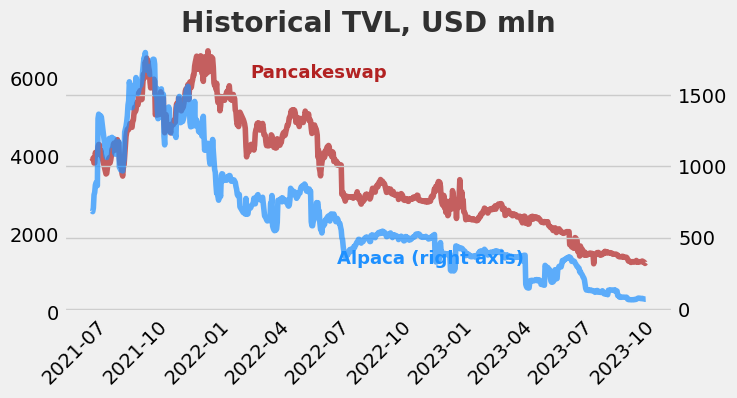

In [318]:
# Plotting the projects' historical TVLs
fig, ax1 = plt.subplots(figsize=(7,4))
# Secondary axis
ax2 = ax1.twinx()

ax1.plot(alpaca_4['Date'], alpaca_4['Cake_TVL'], color='firebrick', alpha=0.7)
ax2.plot(alpaca_4['Date'], alpaca_4['Alpaca_TVL'], color='dodgerblue', alpha=0.7)

# Rotating xticks 45 degrees
fig.autofmt_xdate(rotation=45)

ax1.grid(visible=None)

# Title
ax1.set_title('Historical TVL, USD mln', weight='bold', alpha=0.8)

# Legend
ax1.text(x=19020, y=6000, s='Pancakeswap', size=13, c='firebrick', weight='bold')
ax1.text(x=19150, y=1250, s='Alpaca (right axis)', size=13, c='dodgerblue', weight='bold')

ax1.set_yticks([0, 2000, 4000, 6000])

plt.show()

There seems to be a significant correlation between Alpaca and Pancakeswap TVLs.

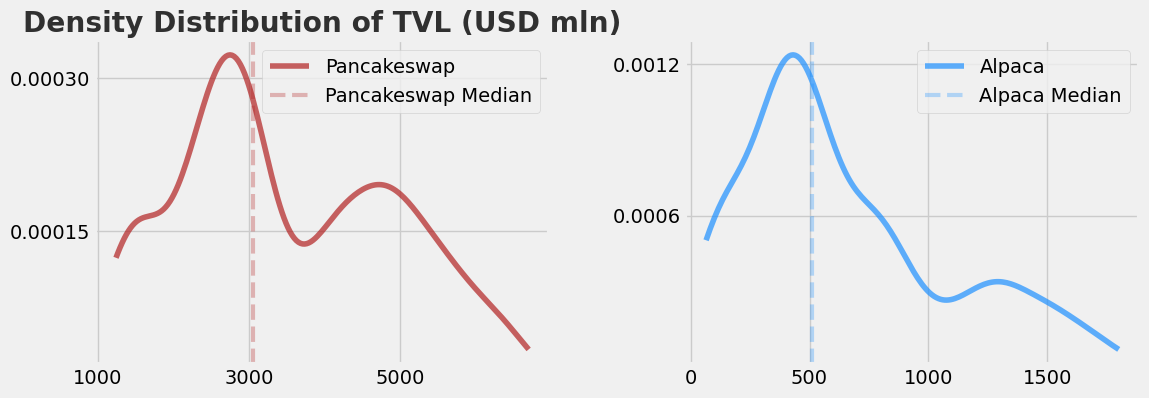

In [319]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# Range of min-max values
range_cake = np.linspace(1240, 6700, 200)
range_al = np.linspace(65, 1800, 200)

# Gaussian kde
density_cake = gaussian_kde(alpaca_4['Cake_TVL'])
density_al = gaussian_kde(alpaca_4['Alpaca_TVL'])

# Visualization of distribution
ax1.plot(range_cake, density_cake(range_cake), color='firebrick', alpha=0.7, label='Pancakeswap')
ax2.plot(range_al, density_al(range_al), color='dodgerblue', alpha=0.7, label='Alpaca')

# Median values
ax2.axvline(x=alpaca_4['Alpaca_TVL'].median(), color='dodgerblue',
            ls='--', alpha=0.3, label='Alpaca Median', lw=3)
ax1.axvline(x=alpaca_4['Cake_TVL'].median(), color='firebrick',
            ls='--', alpha=0.3, label='Pancakeswap Median', lw=3)

# Title
ax1.set_title('Density Distribution of TVL (USD mln)', weight='bold', alpha=0.8)

ax1.legend()
ax2.legend()

ax1.set_yticks([0.00015, 0.0003])
ax1.set_xticks([1000, 3000, 5000])

ax2.set_yticks([0.0006, 0.0012])

fig.subplots_adjust(wspace=0.3)

plt.show()

The distributions of the projects' TVLs look similar, except that Pancakeswap seems to have two distinct peaks (around USD 3 billion and around USD 4.5 billion), while Alpaca's TVLs are closely centered around its median of USD 0.5 billion with less variance.

Next, we will examine the correlation between the project and its DEX.

In [320]:
alpaca_4.corr()

,Alpaca_TVL,Cake_TVL
Alpaca_TVL,1.000000,0.888156
Cake_TVL,0.888156,1.000000


The correlation is extremely high, indicating a significant dependence of Alpaca on Pancakeswap volumes.

Now we can calculate and plot the capture rate.

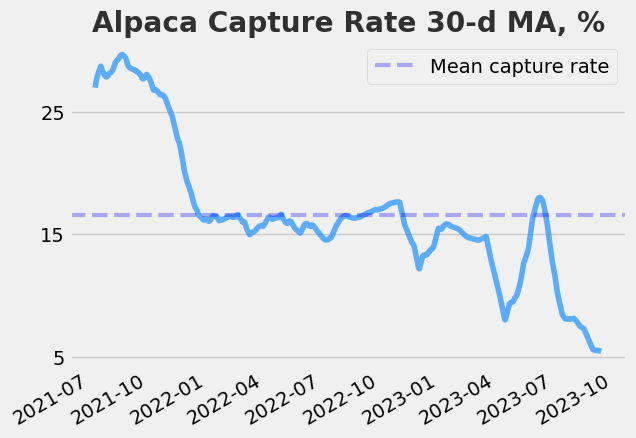

In [321]:
alpaca_4['Capture_rate'] = alpaca_4['Alpaca_TVL'] / alpaca_4['Cake_TVL'] * 100

# Calculating 30-day moving average to smooth out the fluctuations
alpaca_4['Capture_rate_MA30'] = alpaca_4['Capture_rate'].rolling(30).mean()

# Plotting the capture rate
alpaca_4.plot('Date', 'Capture_rate_MA30', color='dodgerblue', label='', alpha=0.7)

plt.axhline(alpaca_4['Capture_rate'].mean(), color='blue', ls='--', alpha=0.3, label='Mean capture rate', lw=3)

plt.title('Alpaca Capture Rate 30-d MA, %', weight='bold', alpha=0.8)

plt.grid(visible=False, axis='x')

plt.xlabel('')
plt.yticks([5, 15, 25])

plt.legend()

plt.show()

In [322]:
alpaca_4['Capture_rate'].describe()

count    821.000000
mean      16.601199
std        6.206090
min        5.054197
25%       14.141861
50%       16.215409
75%       17.668625
max       33.561142
Name: Capture_rate, dtype: float64

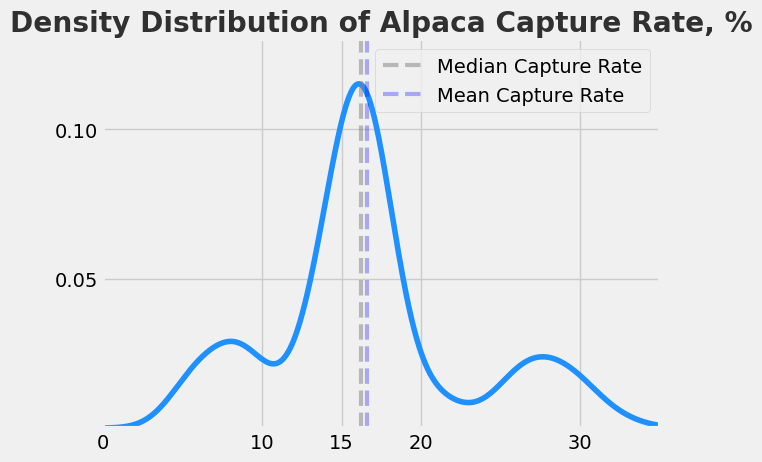

In [323]:
# Plotting the density distribution
alpaca_4['Capture_rate'].plot.kde(label='', color='dodgerblue')

plt.xlim([0,35])
plt.ylim([0, 0.13])

plt.axvline(x=alpaca_4['Capture_rate'].median(), color='grey',
            ls='--', alpha=0.5,label='Median Capture Rate', lw=3)
plt.axvline(x=alpaca_4['Capture_rate'].mean(), color='blue',
            ls='--', alpha=0.3, label='Mean Capture Rate', lw=3)

plt.title('Density Distribution of Alpaca Capture Rate, %', weight='bold', alpha=0.8)

plt.ylabel('')
plt.yticks([0.05, 0.1])
plt.xticks([0, 10, 15, 20, 30])

plt.legend()

plt.show()

The capture rate is concentrated around its mean and median, with moderate variability.

We will use the mean ± standard deviation range, which contains about 2/3 of all values.

In [324]:
alpaca_min = alpaca_4['Capture_rate'].median() - alpaca_4['Capture_rate'].std()
alpaca_max = alpaca_4['Capture_rate'].median() + alpaca_4['Capture_rate'].std()

alpaca_minmax_range = alpaca_4['Capture_rate'][(alpaca_4['Capture_rate'] >= alpaca_min) & (alpaca_4['Capture_rate'] <= alpaca_max)]

print(len(alpaca_minmax_range) / len(alpaca_4['Capture_rate']) * 100)

print(alpaca_min, alpaca_max)

67.72228989037758
10.009318687862782 22.421498797187525


## Tarot platform

We are interested in the platform's (https://www.tarot.to) TVL on Optimism, where it provides leveraged access to Velodrome DEX.

In [325]:
# Importing Tarot dataset
tarot = pd.read_csv('tarot.csv', dtype='object')

tarot

,Unnamed: 0,Date,Timestamp,Tarot,Tarot.1,Tarot.2,Tarot.3,Tarot.4,Tarot.5,Tarot.6,...,Tarot.1508,Tarot.1509,Tarot.1510,Tarot.1511,Tarot.1512,Tarot.1513,Tarot.1514,Tarot.1515,Tarot.1516,Tarot.1517
0,NaN,NaN,NaN,Lending,Lending,Lending,Lending,Lending,Lending,Lending,...,Lending,Lending,Lending,Lending,Lending,Lending,Lending,Lending,Lending,Lending
1,NaN,NaN,NaN,optimism,kava,Total,bsc,ethereum,ethereum-borrowed,arbitrum,...,avalanche-borrowed,avalanche-borrowed,avalanche-borrowed,avalanche-borrowed,avalanche-borrowed,avalanche-borrowed,avalanche-borrowed,avalanche-borrowed,avalanche-borrowed,avalanche-borrowed
2,NaN,NaN,NaN,TVL,TVL,TVL,TVL,TVL,TVL,TVL,...,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,GMX,USDT.E,USDC,WAVAX,BTC.B,TAROT,GRAIN,SNEK,GLCR,AXLDEUS
4,NaN,27/07/2021,1627344000,NaN,NaN,279872.82077061414,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,NaN,09/09/2023,1694217600,1741571.9788883242,64069.02415688357,3607664.4308108273,62310.56204185115,2027.0571743497321,984.2507671724038,154850.5281724492,...,0.12058569361148544,323.186603,480.1659,69.26838453436186,0.01424572,4.898698e-12,NaN,2.84537e-12,119397.08104110762,4.53e-16
766,NaN,10/09/2023,1694304000,1759970.6836282518,46476.17885582335,3616796.6112088985,54568.943516992644,2003.9313789918247,981.6876842780478,148863.559136773,...,0.12058569361148544,323.186603,480.1659,69.26838453436186,0.01424572,4.898698e-12,NaN,2.84537e-12,119397.08104110762,4.53e-16
767,NaN,11/09/2023,1694390400,1772701.8550986897,46347.5568981239,3467531.929406848,53943.037092432096,1842.4659763798982,934.9526716513741,145072.51545745233,...,0.12058569361148544,323.186603,480.1659,69.26838453436186,0.01424572,4.898698e-12,NaN,2.84537e-12,119397.08104110762,4.53e-16
768,NaN,12/09/2023,1694476800,1676681.351887772,67830.10549289442,3409742.3402379523,62142.401975248285,2443.015706589374,864.7939901110472,145398.5378050109,...,0.12058569361148544,323.186603,480.1659,69.26838453436186,0.01424572,4.898698e-12,NaN,2.84537e-12,119397.08104110762,4.53e-16


In [326]:
# Extracting names of TVL columns
tarot_tvls = tarot.iloc[2, :][tarot.iloc[2, :] == 'TVL'].index

# Exploring the columns
tarot[tarot_tvls].iloc[1, :]

Tarot                 optimism
Tarot.1                   kava
Tarot.2                  Total
Tarot.3                    bsc
Tarot.4               ethereum
Tarot.5      ethereum-borrowed
Tarot.6               arbitrum
Tarot.7               borrowed
Tarot.8                 fantom
Tarot.9      arbitrum-borrowed
Tarot.10      polygon-borrowed
Tarot.11          bsc-borrowed
Tarot.12       fantom-borrowed
Tarot.13                   era
Tarot.14        canto-borrowed
Tarot.15     optimism-borrowed
Tarot.16               polygon
Tarot.17          era-borrowed
Tarot.18         kava-borrowed
Tarot.19                 canto
Tarot.20             avalanche
Tarot.21    avalanche-borrowed
Name: 1, dtype: object

In [327]:
# Extracting TVL columns
tarot[tarot_tvls].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tarot     456 non-null    object
 1   Tarot.1   191 non-null    object
 2   Tarot.2   769 non-null    object
 3   Tarot.3   200 non-null    object
 4   Tarot.4   200 non-null    object
 5   Tarot.5   200 non-null    object
 6   Tarot.6   200 non-null    object
 7   Tarot.7   456 non-null    object
 8   Tarot.8   637 non-null    object
 9   Tarot.9   200 non-null    object
 10  Tarot.10  162 non-null    object
 11  Tarot.11  200 non-null    object
 12  Tarot.12  456 non-null    object
 13  Tarot.13  117 non-null    object
 14  Tarot.14  162 non-null    object
 15  Tarot.15  456 non-null    object
 16  Tarot.16  162 non-null    object
 17  Tarot.17  117 non-null    object
 18  Tarot.18  191 non-null    object
 19  Tarot.19  162 non-null    object
 20  Tarot.20  162 non-null    object
 21  Tarot.21  162 no

We will take data on Optimism (without borrowing), i.e. Tarot column.

In [328]:
# Dropping unrelevant columns
tarot_1 = tarot[['Date', 'Tarot']].copy()

# Dropping first 4 NaN rows
tarot_1 = tarot_1.iloc[4:,:]

# Renaming the TVL column
tarot_1 = tarot_1.rename(columns={'Tarot':'Tarot_TVL'})

# Converting TVLs to numeric
tarot_1['Tarot_TVL'] = pd.to_numeric(tarot_1['Tarot_TVL']) / 1000000

# Changing Date to datetime
tarot_1['Date'] = pd.to_datetime(tarot_1['Date'], format='%d/%m/%Y')

tarot_1

,Date,Tarot_TVL
4,2021-07-27,NaN
5,2021-07-28,NaN
6,2021-07-29,NaN
7,2021-07-30,NaN
8,2021-07-31,NaN
...,...,...
765,2023-09-09,1.741572
766,2023-09-10,1.759971
767,2023-09-11,1.772702
768,2023-09-12,1.676681


In [329]:
# Dropping rows with NaN values
tarot_1 = tarot_1.dropna(axis=0)

tarot_1

,Date,Tarot_TVL
317,2022-06-07,0.714746
318,2022-06-08,2.074632
319,2022-06-09,1.123739
320,2022-06-10,1.085593
321,2022-06-11,1.131585
...,...,...
765,2023-09-09,1.741572
766,2023-09-10,1.759971
767,2023-09-11,1.772702
768,2023-09-12,1.676681


### Velodrome DEX

In [330]:
# Importing Velodrome dataset #1
velo_v1 = pd.read_csv('velodrome-v1.csv', dtype='object')

velo_v1

,Unnamed: 0,Date,Timestamp,Velodrome V1,Velodrome V1.1,Velodrome V1.2,Velodrome V1.3,Velodrome V1.4,Velodrome V1.5,Velodrome V1.6,...,Velodrome V1.380,Velodrome V1.381,Velodrome V1.382,Velodrome V1.383,Velodrome V1.384,Velodrome V1.385,Velodrome V1.386,Velodrome V1.387,Velodrome V1.388,Velodrome V1.389
0,NaN,NaN,NaN,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,...,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes
1,NaN,NaN,NaN,optimism,Total,optimism,optimism,optimism,optimism,optimism,...,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total
2,NaN,NaN,NaN,TVL,TVL,Tokens(USD),Tokens(USD),Tokens(USD),Tokens(USD),Tokens(USD),...,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens
3,NaN,NaN,NaN,NaN,NaN,SETH,FXS,THALES,FRAX,USDT,...,MTA,GRAIN,WTBT,FIS,IB,MET,MINE,FIRE,WOPTIDOGE,TBTC
4,NaN,02/06/2022,1654128000,28482726.885625523,28482726.885625523,37.40143993231719,6212.49717974896,98222.46745568918,16386.098297365417,856.0669160370601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,NaN,09/09/2023,1694217600,4698716.445881055,4698716.445881055,272782.01122239826,566.6275658333132,NaN,11302.729665301154,7054.070401514604,...,NaN,NaN,NaN,7.781e-14,NaN,NaN,NaN,NaN,NaN,9.447684e-11
469,NaN,10/09/2023,1694304000,4681242.5353253875,4681242.5353253875,271951.2717323758,557.1029264635519,NaN,11042.735000618119,6982.30823362918,...,NaN,NaN,NaN,7.781e-14,NaN,NaN,NaN,NaN,NaN,9.447684e-11
470,NaN,11/09/2023,1694390400,4638512.98689209,4638512.98689209,261341.87228074836,534.9047720632448,NaN,10828.135186675028,6961.541101514999,...,NaN,NaN,NaN,7.781e-14,NaN,NaN,NaN,NaN,NaN,9.447684e-11
471,NaN,12/09/2023,1694476800,4560044.7921088645,4560044.7921088645,251544.4427333513,546.4569632840766,NaN,11029.835682049832,7031.164068284648,...,NaN,NaN,NaN,7.781e-14,NaN,NaN,NaN,NaN,NaN,9.447684e-11


In [331]:
# Exploring the TVL columns
velo_v1.iloc[:, 3:5].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Velodrome V1    472 non-null    object
 1   Velodrome V1.1  472 non-null    object
dtypes: object(2)
memory usage: 7.5+ KB


Both columns contain all non-zero values and data on TVL.

In [332]:
# Extracting Date and TVL columns
velo_v1_2 = velo_v1.iloc[:, [1, 3]].copy()

# Dropping first 4 NaN rows
velo_v1_2 = velo_v1_2.iloc[4:,:]

# Renaming the TVL column
velo_v1_2 = velo_v1_2.rename(columns={'Velodrome V1':'Velodrome_v1_TVL'})

# Converting TVL to numeric in mln
velo_v1_2['Velodrome_v1_TVL'] = pd.to_numeric(velo_v1_2['Velodrome_v1_TVL']) / 1000000

# Changing Date to datetime
velo_v1_2['Date'] = pd.to_datetime(velo_v1_2['Date'], format='%d/%m/%Y')

velo_v1_2

,Date,Velodrome_v1_TVL
4,2022-06-02,28.482727
5,2022-06-03,30.459542
6,2022-06-04,39.194135
7,2022-06-05,39.295425
8,2022-06-06,42.037041
...,...,...
468,2023-09-09,4.698716
469,2023-09-10,4.681243
470,2023-09-11,4.638513
471,2023-09-12,4.560045


In [333]:
# Importing Velodrome dataset #2
velo_v2 = pd.read_csv('velodrome-v2.csv', dtype='object')

velo_v2

,Unnamed: 0,Date,Timestamp,Velodrome V2,Velodrome V2.1,Velodrome V2.2,Velodrome V2.3,Velodrome V2.4,Velodrome V2.5,Velodrome V2.6,...,Velodrome V2.291,Velodrome V2.292,Velodrome V2.293,Velodrome V2.294,Velodrome V2.295,Velodrome V2.296,Velodrome V2.297,Velodrome V2.298,Velodrome V2.299,Velodrome V2.300
0,NaN,NaN,NaN,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,...,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes
1,NaN,NaN,NaN,optimism,Total,optimism,optimism,optimism,optimism,optimism,...,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total
2,NaN,NaN,NaN,TVL,TVL,Tokens(USD),Tokens(USD),Tokens(USD),Tokens(USD),Tokens(USD),...,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens
3,NaN,NaN,NaN,NaN,NaN,WTBT,STG,USDT,DHT,SUSD,...,KUJI,PEPE,WOPTIDOGE,WLD,T,EXA,AXLUSDC,PENDLE,DUSD,STERN
4,NaN,23/06/2023,1687478400,254014.65119346193,254014.65119346193,917.1550120574673,2.749796181021603,2013.6852125389996,18554.799754991855,111.64142822731527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,NaN,09/09/2023,1694217600,141826042.11945957,141826042.11945957,NaN,NaN,1186878.4661038304,NaN,8209635.044185313,...,94810.842738,508090563.0526668,NaN,NaN,NaN,NaN,144366.141178,347588.1266824989,22883.845722671143,175369.68434136076
83,NaN,10/09/2023,1694304000,141895883.197824,141895883.197824,NaN,NaN,1177492.795397835,NaN,7852372.928478447,...,94810.842738,507702728.31790507,NaN,NaN,NaN,NaN,144165.581564,344798.6942335346,20926.446153585686,170214.79238519803
84,NaN,11/09/2023,1694390400,141035219.0010655,141035219.0010655,NaN,NaN,1181835.4265998278,NaN,7641876.444675177,...,95697.684738,507702728.31790507,NaN,NaN,NaN,NaN,144160.492024,342380.450160048,22439.232143340734,179536.53225926647
85,NaN,12/09/2023,1694476800,139631069.30618438,139631069.30618438,NaN,NaN,1157201.974260245,NaN,7684597.458441746,...,96027.953757,507702728.31790507,NaN,NaN,NaN,NaN,144955.740467,339677.0184534293,22439.06902056534,177555.48332632604


In [334]:
# Exploring the TVL columns
velo_v2.iloc[:, 3:5].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Velodrome V2    86 non-null     object
 1   Velodrome V2.1  86 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


Both columns contain all non-zero values and data on TVL.

In [335]:
# Extracting Date and TVL columns
velo_v2_2 = velo_v2.iloc[:, [1, 3]].copy()

# Dropping first 4 NaN rows
velo_v2_2 = velo_v2_2.iloc[4:,:]

# Renaming the TVL column
velo_v2_2 = velo_v2_2.rename(columns={'Velodrome V2':'Velodrome_v2_TVL'})

# Converting TVL to numeric in mln
velo_v2_2['Velodrome_v2_TVL'] = pd.to_numeric(velo_v2_2['Velodrome_v2_TVL']) / 1000000

# Changing Date to datetime
velo_v2_2['Date'] = pd.to_datetime(velo_v2_2['Date'], format='%d/%m/%Y')

velo_v2_2

,Date,Velodrome_v2_TVL
4,2023-06-23,0.254015
5,2023-06-24,2.457912
6,2023-06-25,2.217998
7,2023-06-26,4.151895
8,2023-06-27,5.821444
...,...,...
82,2023-09-09,141.826042
83,2023-09-10,141.895883
84,2023-09-11,141.035219
85,2023-09-12,139.631069


### Combining Tarot And Velodrome Datasets

Next, we will add up all the Velodrome data and then merge it with the Tarot data set.

In [336]:
# Merging Velodrome datasets
velo = velo_v1_2.merge(right=velo_v2_2, on='Date', how='outer')

velo

,Date,Velodrome_v1_TVL,Velodrome_v2_TVL
0,2022-06-02,28.482727,NaN
1,2022-06-03,30.459542,NaN
2,2022-06-04,39.194135,NaN
3,2022-06-05,39.295425,NaN
4,2022-06-06,42.037041,NaN
...,...,...,...
464,2023-09-09,4.698716,141.826042
465,2023-09-10,4.681243,141.895883
466,2023-09-11,4.638513,141.035219
467,2023-09-12,4.560045,139.631069


In [337]:
# Replacing NaN values with zeroes
velo.fillna(0, inplace=True)

# Adding all Velodrome TVLs as a new column
velo['Velodrome_TVL'] = velo['Velodrome_v1_TVL'] + velo['Velodrome_v2_TVL']

velo

,Date,Velodrome_v1_TVL,Velodrome_v2_TVL,Velodrome_TVL
0,2022-06-02,28.482727,0.000000,28.482727
1,2022-06-03,30.459542,0.000000,30.459542
2,2022-06-04,39.194135,0.000000,39.194135
3,2022-06-05,39.295425,0.000000,39.295425
4,2022-06-06,42.037041,0.000000,42.037041
...,...,...,...,...
464,2023-09-09,4.698716,141.826042,146.524759
465,2023-09-10,4.681243,141.895883,146.577126
466,2023-09-11,4.638513,141.035219,145.673732
467,2023-09-12,4.560045,139.631069,144.191114


In [338]:
# Merging datasets
tarot_2 = tarot_1.merge(right=velo[['Date', 'Velodrome_TVL']], on='Date', how='inner')

tarot_2.sort_values('Date', ascending=True)

,Date,Tarot_TVL,Velodrome_TVL
0,2022-06-07,0.714746,48.716310
1,2022-06-08,2.074632,44.992244
2,2022-06-09,1.123739,36.167042
3,2022-06-10,1.085593,26.221918
4,2022-06-11,1.131585,25.913871
...,...,...,...
448,2023-09-09,1.741572,146.524759
449,2023-09-10,1.759971,146.577126
450,2023-09-11,1.772702,145.673732
451,2023-09-12,1.676681,144.191114


In [339]:
# Exploring combined dataset
tarot_2.describe()

,Tarot_TVL,Velodrome_TVL
count,453.000000,453.000000
mean,3.535998,152.969284
std,1.485073,92.098456
min,0.524744,11.426882
25%,2.378826,72.794776
50%,3.432262,135.832959
75%,4.646366,238.650946
max,8.906056,324.017466


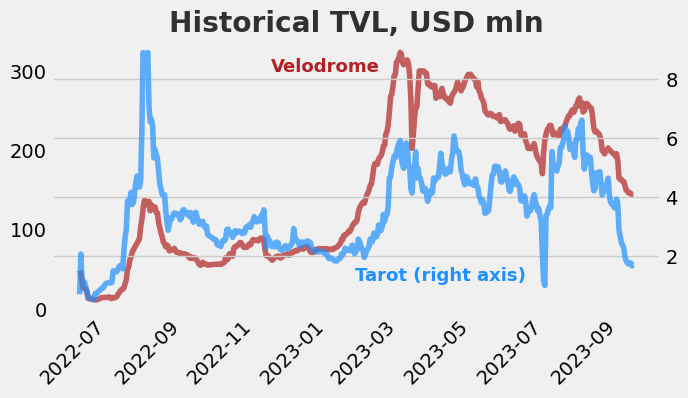

In [340]:
# Plotting the projects' TVLs over time
fig, ax1 = plt.subplots(figsize=(7,4))
ax2 = ax1.twinx()

ax1.plot(tarot_2['Date'], tarot_2['Velodrome_TVL'], color='firebrick', alpha=0.7)
ax2.plot(tarot_2['Date'], tarot_2['Tarot_TVL'], color='dodgerblue', alpha=0.7)

fig.autofmt_xdate(rotation=45)

ax1.grid(visible=None)

# Title
ax1.set_title('Historical TVL, USD mln', weight='bold', alpha=0.8)

# Legend
ax1.text(x=19310, y=300, s='Velodrome', size=13, c='firebrick', weight='bold')
ax1.text(x=19380, y=35, s='Tarot (right axis)', size=13, c='dodgerblue', weight='bold')

plt.show()

Project volumes appear to be strongly correlated.

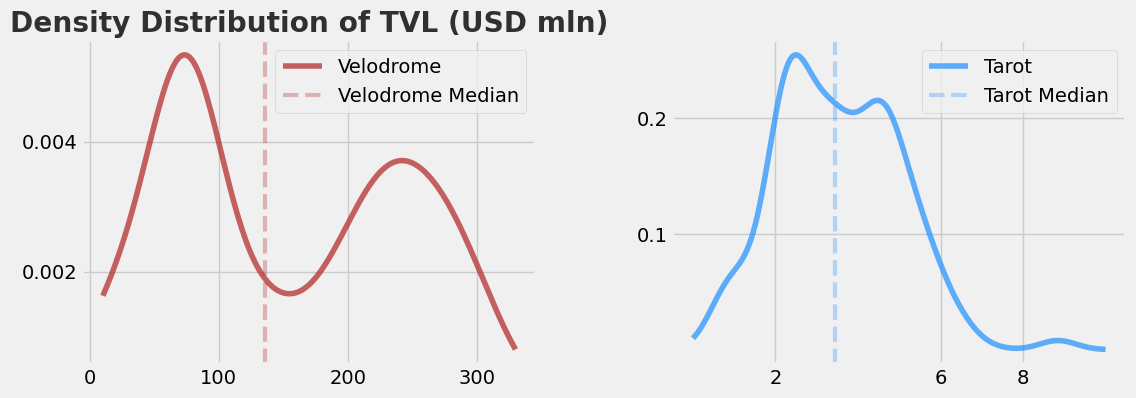

In [341]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# Range of min-max values
range_velo = np.linspace(10, 330, 200)
range_tarot = np.linspace(0, 10, 200)

# Gaussian kde
density_v = gaussian_kde(tarot_2['Velodrome_TVL'])
density_t = gaussian_kde(tarot_2['Tarot_TVL'])

ax1.plot(range_velo, density_v(range_velo), color='firebrick', alpha=0.7, label='Velodrome')
ax2.plot(range_tarot, density_t(range_tarot), color='dodgerblue', alpha=0.7, label='Tarot')

# Median values
ax2.axvline(x=tarot_2['Tarot_TVL'].median(), color='dodgerblue',
            ls='--', alpha=0.3, label='Tarot Median', lw=3)
ax1.axvline(x=tarot_2['Velodrome_TVL'].median(), color='firebrick',
            ls='--', alpha=0.3, label='Velodrome Median', lw=3)

# Title
ax1.set_title('Density Distribution of TVL (USD mln)', weight='bold', alpha=0.8)

ax1.legend()
ax2.legend()

ax1.set_yticks([0.002, 0.004])
ax2.set_yticks([0.1, 0.2])
ax2.set_xticks([2, 6, 8])

fig.subplots_adjust(wspace=0.3)

plt.show()

The Velodrome density distribution is bifurcated, with the first peak occurring during the project's initial phase (2022, average TVL of approximately USD 75 million) and the second peak occurring during a more mature development phase (2023, approximately USD 250 million).

Tarot volumes and variance are much lower, and its TVL is almost entirely in the range of USD 2-6 mln.

In [342]:
tarot_2.corr()

,Tarot_TVL,Velodrome_TVL
Tarot_TVL,1.000000,0.715393
Velodrome_TVL,0.715393,1.000000


As expected, the correlation is quite high.

Now we can calculate and plot the capture rate.

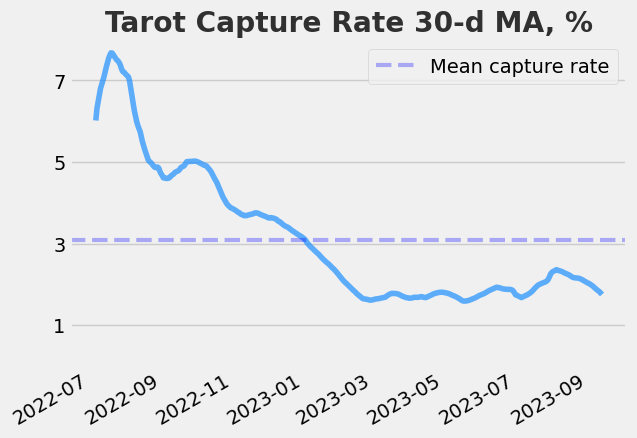

In [343]:
tarot_2['Capture_rate'] = tarot_2['Tarot_TVL'] / tarot_2['Velodrome_TVL'] * 100

# Calculating 30-day moving average to smooth out the fluctuations
tarot_2['Capture_rate_MA30'] = tarot_2['Capture_rate'].rolling(30).mean()

# Plotting the capture rate
tarot_2.plot('Date', 'Capture_rate_MA30', color='dodgerblue', label='', alpha=0.7)

plt.axhline(tarot_2['Capture_rate'].mean(), color='blue',
            ls='--', alpha=0.3, label='Mean capture rate', lw=3)

plt.title('Tarot Capture Rate 30-d MA, %', weight='bold', alpha=0.8)

plt.grid(visible=False, axis='x')

plt.ylim([0, 8])

plt.xlabel('')
plt.yticks([1, 3, 5, 7])

plt.legend()

plt.show()

As the volume of its donor, Velodrome, increased starting in early 2023, Tarot was unable to capture this increased traffic and lost momentum. This may also explain how Extra Finance was created in mid-2023 to capture the volumes lost by Tarot.

In [344]:
tarot_2['Capture_rate'].describe()

count    453.000000
mean       3.098364
std        1.771156
min        0.474452
25%        1.821704
50%        2.327920
75%        3.998519
max       10.574150
Name: Capture_rate, dtype: float64

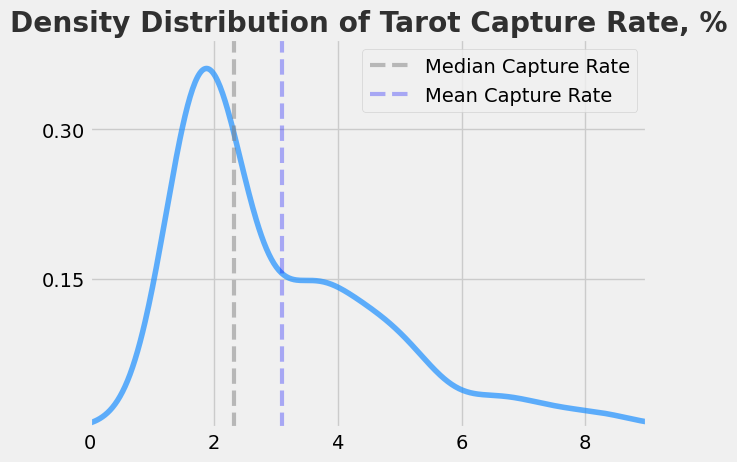

In [345]:
# Plotting the density distribution
tarot_2['Capture_rate'].plot.kde(label='', color='dodgerblue', alpha=0.7)

plt.xlim([0,9])
plt.ylim([0, 0.39])

plt.axvline(x=tarot_2['Capture_rate'].median(), color='grey',
            ls='--', alpha=0.5,label='Median Capture Rate', lw=3)
plt.axvline(x=tarot_2['Capture_rate'].mean(), color='blue',
            ls='--', alpha=0.3, label='Mean Capture Rate', lw=3)

plt.title('Density Distribution of Tarot Capture Rate, %', weight='bold', alpha=0.8)

plt.ylabel('')

plt.yticks([0.15, 0.3])
plt.xticks([0, 2, 4, 6, 8])

plt.legend()

plt.show()

The distribution is centered around the median with skewness to the right.

We will use the median ± standard deviation range for the benchmark.

In [346]:
tarot_min = tarot_2['Capture_rate'].median() - tarot_2['Capture_rate'].std()
tarot_max = tarot_2['Capture_rate'].median() + tarot_2['Capture_rate'].std()

tarot_minmax_range = tarot_2['Capture_rate'][(tarot_2['Capture_rate'] >= tarot_min) & (tarot_2['Capture_rate'] <= tarot_max)]

print(len(tarot_minmax_range) / len(tarot_2['Capture_rate']) * 100)

print(tarot_min, tarot_max)

75.71743929359823
0.5567642441186831 4.099075401510214


## Conclusion on Capture Rates

The analysis shows leveraged platforms' volumes are highly correlated to their associated DEX volumes (Pearson 0.6-0.9). Successful platforms like Francium and Alpaca Finance typically capture 10-25% of DEX TVL. Smaller platforms like Tarot capture <4%.

Extra Finance has already exceeded Tarot's max TVL after 4 months, implying a higher 15%+ capture rate. Given this, we will discard Tarot's low capture rates.

Instead, we will estimate Extra Finance's potential TVL by applying the 10-25% benchmark range to the median historical TVL of its connected DEX, Velodrome, and the current TVL of its newer associated DEX, Aerodrome.

This data-driven approach using comparable platform capture rate benchmarks will provide a projected TVL range for Extra Finance based on its connected DEX volumes and relative adoption.

In [347]:
# Calculating min and max estimates based on Velodrome (Optimism) volumes
extra_op_min = tarot_2['Velodrome_TVL'].median() * 0.1
extra_op_max = tarot_2['Velodrome_TVL'].median() * 0.25

# Calculating min and max estimates based on Aerodrome (Base) current TVL of USD 125.26 mln
extra_base_min = 125.26 * 0.1
extra_base_max = 125.26 * 0.25

# Calculating total sums
extra_min = extra_op_min + extra_base_min
extra_max = extra_op_max + extra_base_max

print(' Extra Finance projected TVL range: from USD', round(extra_min, 2), 'mln to USD', round(extra_max, 2), 'mln',
      '\n',
     'Average estimated TVL: USD', round((extra_min + extra_max)/2, 2), 'mln')

 Extra Finance projected TVL range: from USD 26.11 mln to USD 65.27 mln 
 Average estimated TVL: USD 45.69 mln


Currently the project has total TVL of USD 25.3 mln, near the lower bound of the projected range based on benchmarks. This implies it has room to grow if it follows similar patterns.

As Velodrome and Aerodrome continue to develop and expand their own TVL, this will likely lift the ceiling for Extra Finance as well if it can maintain Capture rates.

## II. Market Cap / TVL

Here we will examine the dynamics of the market cap to TVL ratio of the leveraged platforms and average the result to get the benchmark ratio for the Extra Finance valuation.

Francium did not issue the token, so we will only analyze Alpaca and Tarot valuations.

Market cap data was downloaded from https://www.coingecko.com/ on 14/09/2022.

## Alpaca Finance Valuation

In [348]:
alpaca_cap = pd.read_csv('alpaca-usd-max.csv')

alpaca_cap

,snapped_at,price,market_cap,total_volume
0,2021-03-03 00:00:00 UTC,4.348623,0.000000e+00,2.480665e+07
1,2021-03-04 00:00:00 UTC,4.348623,0.000000e+00,2.480665e+07
2,2021-03-05 00:00:00 UTC,6.277247,3.247768e+07,5.269737e+07
3,2021-03-06 00:00:00 UTC,8.561506,5.184785e+07,3.687722e+07
4,2021-03-07 00:00:00 UTC,8.054123,5.600939e+07,2.139213e+07
...,...,...,...,...
921,2023-09-10 00:00:00 UTC,0.134926,2.036540e+07,8.962064e+05
922,2023-09-11 00:00:00 UTC,0.130228,1.965296e+07,1.465785e+06
923,2023-09-12 00:00:00 UTC,0.127011,1.915301e+07,1.086164e+06
924,2023-09-13 00:00:00 UTC,0.127878,1.929318e+07,2.426227e+06


In [349]:
# Adjusting date column
alpaca_cap['Date'] = pd.to_datetime(alpaca_cap['snapped_at']).dt.date.astype('datetime64')

# Converting Market cap into mln
alpaca_cap['market_cap'] = alpaca_cap['market_cap'] / 1000000

In [350]:
alpaca_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   snapped_at    926 non-null    object        
 1   price         926 non-null    float64       
 2   market_cap    926 non-null    float64       
 3   total_volume  926 non-null    float64       
 4   Date          926 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 36.3+ KB


Since over 99% of Alpaca Finance TVL is on the BSC network that we analyzed earlier, we could safely use the previous dataset with TVL values.

In [351]:
# Merging with Alpaca dataset containing TVL
alpaca_cap_1 = alpaca_cap[['Date', 'market_cap']].merge(right=alpaca_3[['Date', 'Alpaca_TVL']],
                                                        on='Date', how='inner')

alpaca_cap_1.sort_values('Date', ascending=True)

,Date,market_cap,Alpaca_TVL
0,2021-06-04,92.893899,688.329460
1,2021-06-05,86.595578,683.161903
2,2021-06-06,78.507510,708.653775
3,2021-06-07,77.379198,800.830759
4,2021-06-08,73.951414,818.367571
...,...,...,...
816,2023-09-09,20.491309,72.203287
817,2023-09-10,20.365396,71.892190
818,2023-09-11,19.652963,70.348623
819,2023-09-12,19.153006,69.201556


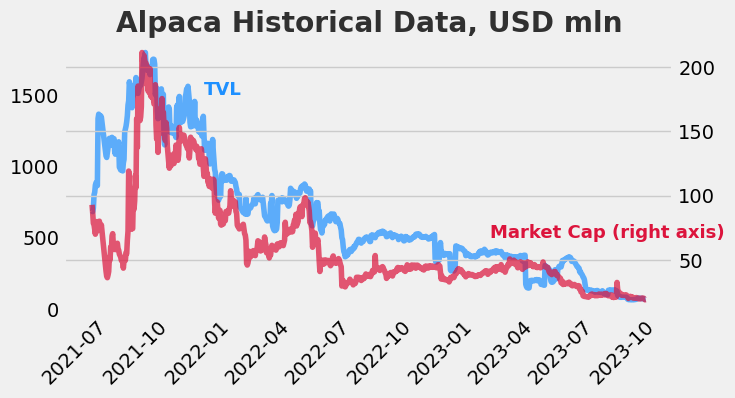

In [352]:
# Plotting the project TVL and Market cap
fig, ax1 = plt.subplots(figsize=(7,4))
ax2 = ax1.twinx()

ax1.plot(alpaca_cap_1['Date'], alpaca_cap_1['Alpaca_TVL'], color='dodgerblue', alpha=0.7)
ax2.plot(alpaca_cap_1['Date'], alpaca_cap_1['market_cap'], color='crimson', alpha=0.7)

fig.autofmt_xdate(rotation=45)

ax1.grid(visible=None)

# Title
ax1.set_title('Alpaca Historical Data, USD mln', weight='bold', alpha=0.8)

# Legend
ax1.text(x=18950, y=1500, s='TVL', size=13, c='dodgerblue', weight='bold')
ax1.text(x=19380, y=500, s='Market Cap (right axis)', size=13, c='crimson', weight='bold')

plt.show()

In [353]:
# Exploring the correlation
alpaca_cap_1.corr()

,market_cap,Alpaca_TVL
market_cap,1.000000,0.898214
Alpaca_TVL,0.898214,1.000000


The correlation between the project's Market cap and TVL is extremely high.

In [354]:
# Calculating Market cap to TVL ratio
alpaca_cap_1['MCap_to_TVL'] = alpaca_cap_1['market_cap'] / alpaca_cap_1['Alpaca_TVL']

alpaca_cap_1

,Date,market_cap,Alpaca_TVL,MCap_to_TVL
0,2021-06-04,92.893899,688.329460,0.134956
1,2021-06-05,86.595578,683.161903,0.126757
2,2021-06-06,78.507510,708.653775,0.110784
3,2021-06-07,77.379198,800.830759,0.096624
4,2021-06-08,73.951414,818.367571,0.090365
...,...,...,...,...
816,2023-09-09,20.491309,72.203287,0.283800
817,2023-09-10,20.365396,71.892190,0.283277
818,2023-09-11,19.652963,70.348623,0.279365
819,2023-09-12,19.153006,69.201556,0.276771


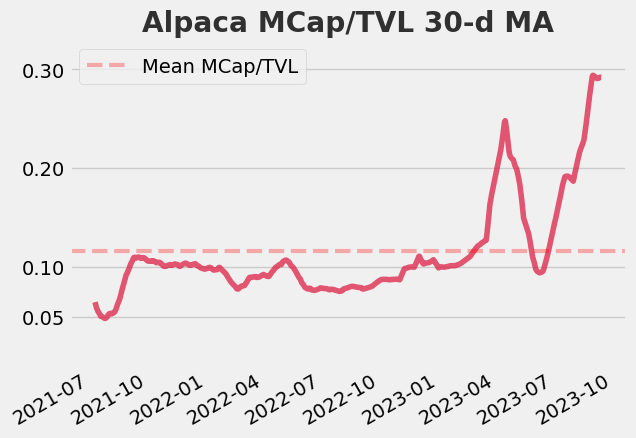

In [355]:
# Calculating 30-day moving average to smooth out the fluctuations
alpaca_cap_1['MCap_to_TVL_MA30'] = alpaca_cap_1['MCap_to_TVL'].rolling(30).mean()

# Plotting the cap rate
alpaca_cap_1.plot('Date', 'MCap_to_TVL_MA30', color='crimson', label='', alpha=0.7)

plt.axhline(alpaca_cap_1['MCap_to_TVL'].mean(), color='red',
            ls='--', alpha=0.3, lw=3, label='Mean MCap/TVL')

plt.title('Alpaca MCap/TVL 30-d MA', weight='bold', alpha=0.8)

plt.grid(visible=False, axis='x')

plt.ylim([0, 0.33])
plt.yticks([0.05, 0.1, 0.2, 0.3])

plt.xlabel('')

plt.legend()

plt.show()

In [356]:
alpaca_cap_1['MCap_to_TVL'].describe()

count    821.000000
mean       0.115999
std        0.058169
min        0.033044
25%        0.083835
50%        0.099452
75%        0.117695
max        0.331046
Name: MCap_to_TVL, dtype: float64

Alpaca volumes declined significantly in 2023, while its valuation showed more resilience, resulting in a rising MCap/TVL ratio.

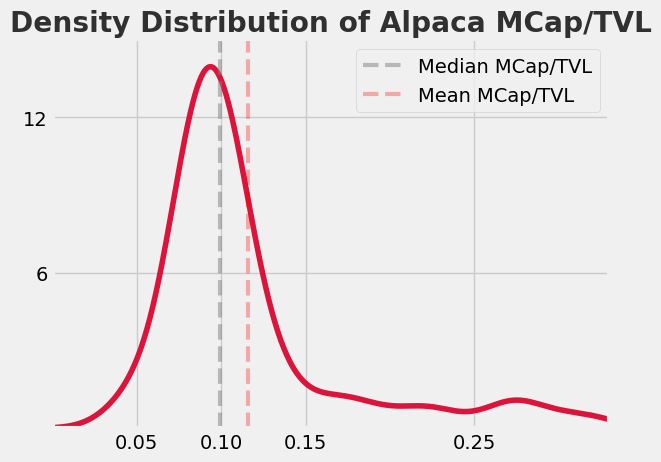

In [357]:
# Plotting the density distribution
alpaca_cap_1['MCap_to_TVL'].plot.kde(label='', color='crimson')

plt.xlim([0,0.33])
plt.ylim([0, 15])

plt.axvline(x=alpaca_cap_1['MCap_to_TVL'].median(), color='grey',
            ls='--', alpha=0.5,label='Median MCap/TVL', lw=3)
plt.axvline(x=alpaca_cap_1['MCap_to_TVL'].mean(), color='red',
            ls='--', alpha=0.3, label='Mean MCap/TVL', lw=3)

plt.title('Density Distribution of Alpaca MCap/TVL', weight='bold', alpha=0.8)

plt.ylabel('')

plt.xticks([0.05, 0.1, 0.15, 0.25])

plt.yticks([6, 12])

plt.legend()

plt.show()

Since the distribution is closely centered around the median and the standard deviation is relatively low, we will use the median (0.1) as a benchmark here.

In [358]:
alpaca_cap_1['MCap_to_TVL'].median()

0.09945198149702686

## Tarot Valuation

In [359]:
tarot_cap = pd.read_csv('tarot-usd-max.csv')

tarot_cap

,snapped_at,price,market_cap,total_volume
0,2021-08-23 00:00:00 UTC,0.441255,0.000000e+00,391868.186891
1,2021-08-24 00:00:00 UTC,0.441255,0.000000e+00,391868.186891
2,2021-08-25 00:00:00 UTC,0.408200,0.000000e+00,208706.807572
3,2021-08-26 00:00:00 UTC,0.369513,0.000000e+00,504044.002616
4,2021-08-27 00:00:00 UTC,0.273167,0.000000e+00,179123.705163
...,...,...,...,...
748,2023-09-10 00:00:00 UTC,0.037132,2.075076e+06,585.629257
749,2023-09-11 00:00:00 UTC,0.035479,1.981581e+06,178.926692
750,2023-09-12 00:00:00 UTC,0.095161,5.313400e+06,2213.245501
751,2023-09-13 00:00:00 UTC,0.075458,4.216874e+06,594.860235


In [360]:
# Adjusting date column
tarot_cap['Date'] = pd.to_datetime(tarot_cap['snapped_at']).dt.date.astype('datetime64')

# Converting Market cap into mln
tarot_cap['market_cap'] = tarot_cap['market_cap'] / 1000000

In [361]:
tarot_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   snapped_at    753 non-null    object        
 1   price         753 non-null    float64       
 2   market_cap    753 non-null    float64       
 3   total_volume  753 non-null    float64       
 4   Date          753 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 29.5+ KB


Since we previously analyzed Tarot TVL only on the Optimism chain, and the project has many other chains available, we will use the initial dataset.

In [362]:
tarot[tarot_tvls].iloc[1, :]

Tarot                 optimism
Tarot.1                   kava
Tarot.2                  Total
Tarot.3                    bsc
Tarot.4               ethereum
Tarot.5      ethereum-borrowed
Tarot.6               arbitrum
Tarot.7               borrowed
Tarot.8                 fantom
Tarot.9      arbitrum-borrowed
Tarot.10      polygon-borrowed
Tarot.11          bsc-borrowed
Tarot.12       fantom-borrowed
Tarot.13                   era
Tarot.14        canto-borrowed
Tarot.15     optimism-borrowed
Tarot.16               polygon
Tarot.17          era-borrowed
Tarot.18         kava-borrowed
Tarot.19                 canto
Tarot.20             avalanche
Tarot.21    avalanche-borrowed
Name: 1, dtype: object

We will use Total column (Tarot.2).

In [363]:
# Dropping unrelevant columns
tarot_tvl = tarot[['Date', 'Tarot.2']].copy()

# Dropping first 4 NaN rows
tarot_tvl = tarot_tvl.iloc[4:,:]

# Renaming the TVL column
tarot_tvl = tarot_tvl.rename(columns={'Tarot.2':'Tarot_TVL'})

# Converting TVLs to numeric
tarot_tvl['Tarot_TVL'] = pd.to_numeric(tarot_tvl['Tarot_TVL']) / 1000000

# Changing Date to datetime
tarot_tvl['Date'] = pd.to_datetime(tarot_tvl['Date'], format='%d/%m/%Y')

tarot_tvl

,Date,Tarot_TVL
4,2021-07-27,0.279873
5,2021-07-28,0.288444
6,2021-07-29,0.313577
7,2021-07-30,0.314722
8,2021-07-31,0.323091
...,...,...
765,2023-09-09,3.607664
766,2023-09-10,3.616797
767,2023-09-11,3.467532
768,2023-09-12,3.409742


In [364]:
# Merging with Tarot dataset containing TVL
tarot_cap_1 = tarot_cap[['Date', 'market_cap']].merge(right=tarot_tvl[['Date', 'Tarot_TVL']],
                                                        on='Date', how='inner')

tarot_cap_1.sort_values('Date', ascending=True)

,Date,market_cap,Tarot_TVL
0,2021-08-23,0.000000,6.299408
1,2021-08-24,0.000000,6.117699
2,2021-08-25,0.000000,6.630688
3,2021-08-27,0.000000,6.401153
4,2021-08-28,0.000000,6.725051
...,...,...,...
734,2023-09-09,4.383316,3.607664
735,2023-09-10,2.075076,3.616797
736,2023-09-11,1.981581,3.467532
737,2023-09-12,5.313400,3.409742


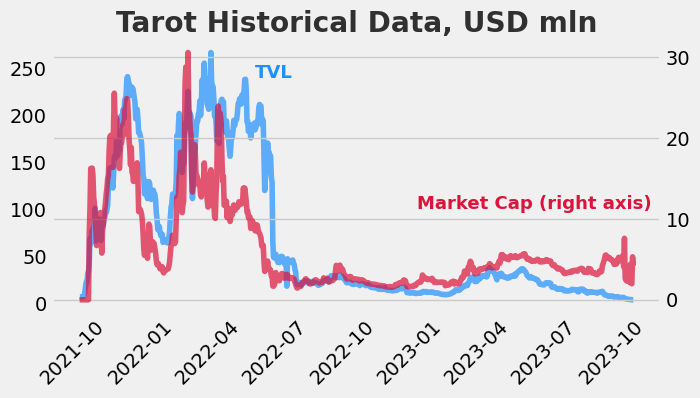

In [365]:
# Plotting the project TVL and Market cap
fig, ax1 = plt.subplots(figsize=(7,4))
ax2 = ax1.twinx()

ax1.plot(tarot_cap_1['Date'], tarot_cap_1['Tarot_TVL'], color='dodgerblue', alpha=0.7)
ax2.plot(tarot_cap_1['Date'], tarot_cap_1['market_cap'], color='crimson', alpha=0.7)

fig.autofmt_xdate(rotation=45)

ax1.grid(visible=None)

# Title
ax1.set_title('Tarot Historical Data, USD mln', weight='bold', alpha=0.8)

# Legend
ax1.text(x=19100, y=240, s='TVL', size=13, c='dodgerblue', weight='bold')
ax1.text(x=19320, y=100, s='Market Cap (right axis)', size=13, c='crimson', weight='bold')

plt.show()

In [366]:
# Exploring the correlation
tarot_cap_1.corr()

,market_cap,Tarot_TVL
market_cap,1.000000,0.834921
Tarot_TVL,0.834921,1.000000


There is a strong correlation between TVL and the market valuation of the project.

In [367]:
# Calculating Market cap to TVL ratio
tarot_cap_1['MCap_to_TVL'] = tarot_cap_1['market_cap'] / tarot_cap_1['Tarot_TVL']

tarot_cap_1

,Date,market_cap,Tarot_TVL,MCap_to_TVL
0,2021-08-23,0.000000,6.299408,0.000000
1,2021-08-24,0.000000,6.117699,0.000000
2,2021-08-25,0.000000,6.630688,0.000000
3,2021-08-27,0.000000,6.401153,0.000000
4,2021-08-28,0.000000,6.725051,0.000000
...,...,...,...,...
734,2023-09-09,4.383316,3.607664,1.215001
735,2023-09-10,2.075076,3.616797,0.573733
736,2023-09-11,1.981581,3.467532,0.571467
737,2023-09-12,5.313400,3.409742,1.558300


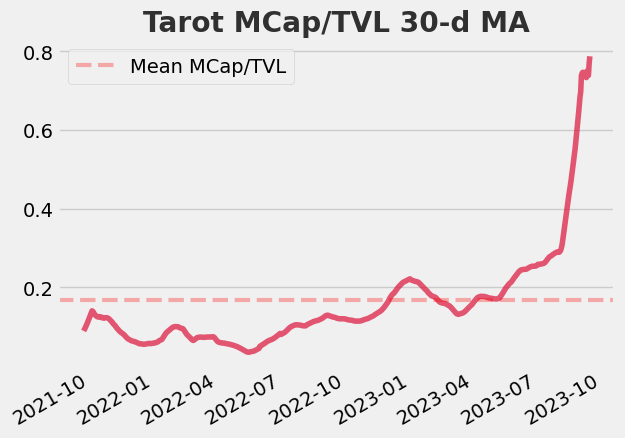

In [368]:
# Calculating 30-day moving average to smooth out the fluctuations
tarot_cap_1['MCap_to_TVL_MA30'] = tarot_cap_1['MCap_to_TVL'].rolling(30).mean()

# Plotting the cap rate
tarot_cap_1.plot('Date', 'MCap_to_TVL_MA30', color='crimson', label='', alpha=0.7)

plt.axhline(tarot_cap_1['MCap_to_TVL'].mean(), color='red',
            ls='--', alpha=0.3, lw=3, label='Mean MCap/TVL')

plt.title('Tarot MCap/TVL 30-d MA', weight='bold', alpha=0.8)

plt.grid(visible=False, axis='x')

plt.ylim([0, 0.83])

plt.xlabel('')
plt.yticks([0.2, 0.4, 0.6, 0.8])

plt.legend()

plt.show()

The rate of decline in TVL in 2023 exceeded the rate of decline in market valuation, resulting in MCap/TVL ratios close to 1.0.

In [369]:
tarot_cap_1['MCap_to_TVL'].describe()

count    739.000000
mean       0.166825
std        0.168543
min        0.000000
25%        0.069267
50%        0.124322
75%        0.195656
max        1.562322
Name: MCap_to_TVL, dtype: float64

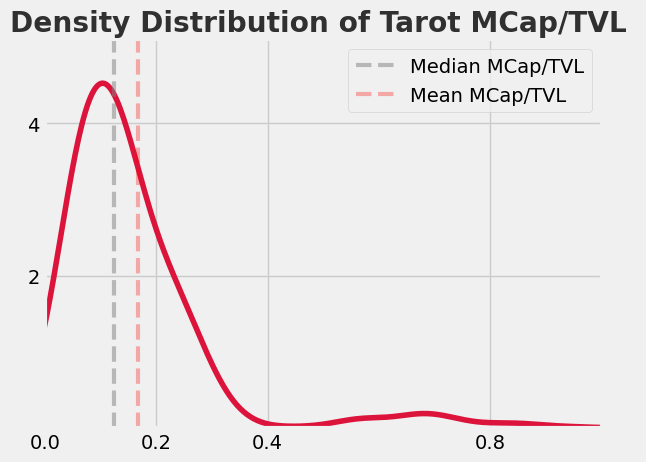

In [370]:
# Plotting the density distribution
tarot_cap_1['MCap_to_TVL'].plot.kde(label='', color='crimson')

plt.xlim([0,1])
plt.ylim([0, 5.1])

plt.axvline(x=tarot_cap_1['MCap_to_TVL'].median(), color='grey',
            ls='--', alpha=0.5,label='Median MCap/TVL', lw=3)
plt.axvline(x=tarot_cap_1['MCap_to_TVL'].mean(), color='red',
            ls='--', alpha=0.3, label='Mean MCap/TVL', lw=3)

plt.title('Density Distribution of Tarot MCap/TVL ', weight='bold', alpha=0.8)

plt.ylabel('')

plt.yticks([2, 4])
plt.xticks([0, 0.2, 0.4, 0.8])

plt.legend()

plt.show()

The distribution is more dispersed with few outliers on the higher end, so will use mean instead of the median.

In [371]:
tarot_cap_1['MCap_to_TVL'].mean()

0.16682490477257841

Finally, we can calculate the benchmark valuation ratio by averaging the MCap/TVL of the two comparable projects.

In [372]:
benchmark_cap_ratio = (tarot_cap_1['MCap_to_TVL'].mean() + alpaca_cap_1['MCap_to_TVL'].median()) / 2

print(benchmark_cap_ratio)

0.13313844313480264


## Conclusion on Valuation

Now we can calculate the expected range of Extra Finance valuations given the benchmark TVL and the Market cap/TVL ratio.

We will use the lower bound of the benchmark TVL range and the lower of the benchmark valuation ratios for the worst case scenario.

In [373]:
extra_mcap_min = extra_min * benchmark_cap_ratio
extra_mcap_max = extra_max * benchmark_cap_ratio

print(' Extra Finance projected Market Cap range: from USD', round(extra_mcap_min, 2), 'mln to USD',
      round(extra_mcap_max, 2), 'mln',
      '\n',
     'Average estimated Market Cap: USD', round((extra_mcap_min + extra_mcap_max)/2, 2), 'mln',
      '\n',
     'Worst case Market Cap: USD', round(alpaca_cap_1['MCap_to_TVL'].median() * extra_min, 2), 'mln')

 Extra Finance projected Market Cap range: from USD 3.48 mln to USD 8.69 mln 
 Average estimated Market Cap: USD 6.08 mln 
 Worst case Market Cap: USD 2.6 mln


We can visualize the results against the real valuations of Extra Finance.

In [374]:
ef = pd.read_csv('extra-usd-max.csv')

ef

,snapped_at,price,market_cap,total_volume
0,2023-07-14 00:00:00 UTC,0.019835,0.000000e+00,61693.831331
1,2023-07-15 00:00:00 UTC,0.019835,0.000000e+00,61693.831331
2,2023-07-16 00:00:00 UTC,0.017934,0.000000e+00,39159.185088
3,2023-07-17 00:00:00 UTC,0.020921,0.000000e+00,37810.167463
4,2023-07-18 00:00:00 UTC,0.031053,2.483348e+06,113497.873180
...,...,...,...,...
65,2023-09-17 00:00:00 UTC,0.019209,2.293472e+06,8803.154111
66,2023-09-18 00:00:00 UTC,0.019300,2.296654e+06,15866.126136
67,2023-09-19 00:00:00 UTC,0.018911,2.269082e+06,37590.284181
68,2023-09-20 00:00:00 UTC,0.021375,2.550492e+06,65672.265275


In [375]:
# Adjusting date column
ef['Date'] = pd.to_datetime(ef['snapped_at']).dt.date.astype('datetime64')

# Converting Market cap into mln
ef['market_cap'] = ef['market_cap'] / 1000000

ef

,snapped_at,price,market_cap,total_volume,Date
0,2023-07-14 00:00:00 UTC,0.019835,0.000000,61693.831331,2023-07-14
1,2023-07-15 00:00:00 UTC,0.019835,0.000000,61693.831331,2023-07-15
2,2023-07-16 00:00:00 UTC,0.017934,0.000000,39159.185088,2023-07-16
3,2023-07-17 00:00:00 UTC,0.020921,0.000000,37810.167463,2023-07-17
4,2023-07-18 00:00:00 UTC,0.031053,2.483348,113497.873180,2023-07-18
...,...,...,...,...,...
65,2023-09-17 00:00:00 UTC,0.019209,2.293472,8803.154111,2023-09-17
66,2023-09-18 00:00:00 UTC,0.019300,2.296654,15866.126136,2023-09-18
67,2023-09-19 00:00:00 UTC,0.018911,2.269082,37590.284181,2023-09-19
68,2023-09-20 00:00:00 UTC,0.021375,2.550492,65672.265275,2023-09-20


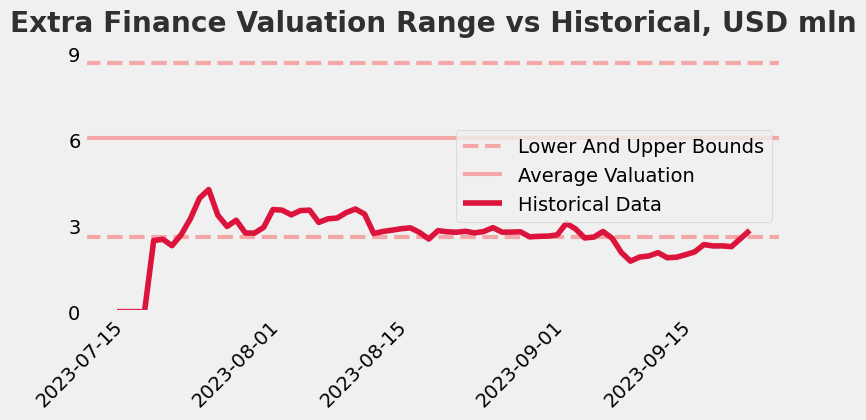

In [376]:
# Valuations
val_low = round(alpaca_cap_1['MCap_to_TVL'].median() * extra_min, 2)
val_avg = round((extra_mcap_min + extra_mcap_max)/2, 2)
val_high = round(extra_mcap_max, 2)

# Visualization
fig, ax = plt.subplots(figsize=(8,4))

ax.axhline(val_low, ls='--', color='red', label='Lower And Upper Bounds', lw=3, alpha=0.3) 
ax.axhline(val_avg, color='red', ls='-', label='Average Valuation', lw=3, alpha=0.3)
ax.axhline(val_high, ls='--', color='red', lw=3, alpha=0.3)

# Historical data line
ax.plot(ef['Date'], ef['market_cap'], color='crimson', label='Historical Data')

ax.set_title('Extra Finance Valuation Range vs Historical, USD mln', weight='bold', alpha=0.8)

ax.set_ylim([0,9.5])

ax.set_yticks([0, 3, 6, 9])

fig.autofmt_xdate(rotation=45)

plt.grid(visible=False, axis='both')

ax.legend()

plt.show()

The current valuation of the project is close to the conservative boundary, implying growth opportunities if the platform executes well. This is also consistent with our findings on the project's TVL estimates.

# Conclusion

This analysis aimed to estimate the potential valuation range for the new crypto platform Extra Finance using data-driven benchmarks. The approach involved analyzing comparable platforms to derive TVL and Market Cap/TVL ratio benchmarks based on historical data.

The key results found Extra Finance's current USD 25M TVL and USD 3M Market Cap are near the lower bound of the projected USD 26-65M TVL and USD 3-9M Market Cap ranges. This indicates room for growth if Extra Finance continues increasing adoption per the benchmarks. While still an estimate, the framework provides more grounded valuation projections for new cryptos lacking extensive financial data. In summary, data-driven benchmarking of comparable platforms provided useful indicators of feasibility and growth potential for the new Extra Finance platform based on current traction.